# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Fadli
- **Email:** mfadli1272@gmail.com
- **ID Dicoding:** muhammad_fadli_vIhe

## Menentukan Pertanyaan

- Bagaimana sebaran polutan yang memengaruhi kualitas udara di beberapa distrik di Beijing?
- Bagaimana korelasi antara polutan dengan faktor lingkungan lainnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

## Data Wrangling

### Gathering Data

In [2]:
## Import semua file yang ada di github
file_urls = [
    "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv",
    "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv",
    "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv",
    "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv",
    "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv",
    "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv",
    "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv",
    "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv",
    "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv",
]

df = []

for url in file_urls:
  df.append(pd.read_csv(url))

## Gabungkan menjadi 1 dataframe
merged_df = pd.concat(df, ignore_index=True)

merged_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [3]:
merged_df.tail()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
420763  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong

In [4]:
merged_df.describe()

No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.000000      36.000000       3.000000   
50%        11.500000      55.000000      82.000000       7.000000   
75%        17.250000     111.000000     145.000000      20.000000   
max        23.000000     999.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  408652.000000  400067.000000  407491.000000  420370.000000   
mean       50.638586    1230.766454      57.372271      13.538976   
std        35.127912    1160.182716      56.661607      11.436139   
min         1.026500     100.000000       0.214200     -19.900000   
25%        23.000000     500.000000      11.000000       3.100000   
50%        43.000000     900.000000      45.000000      14.500000   
75%        71.000000    1500.000000      82.000000      23.300000   
max       290.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  420375.000000  420365.000000  420378.000000  420450.000000  
mean     1010.746982       2.490822       0.064476       1.729711  
std        10.474055      13.793847       0.821004       1.246386  
min       982.400000     -43.400000       0.000000       0.000000  
25%      1002.300000      -8.900000       0.000000       0.900000  
50%      1010.400000       3.100000       0.000000       1.400000  
75%      1019.000000      15.100000       0.000000       2.200000  
max      1042.800000      29.100000      72.500000      13.200000

### Assessing Data

In [5]:
merged_df.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [7]:
merged_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [8]:
merged_df.duplicated().sum()

0

### Cleaning Data

In [9]:
# Menghapus kolom 'No' karena tidak akan kita gunakan
merged_df = merged_df.drop(['No'], axis=1)
merged_df.head()

year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
0  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0   
1  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2   
2  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5   
3  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5   
4  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2   

   DEWP  RAIN   wd  WSPM       station  
0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1 -18.2   0.0    N   4.7  Aotizhongxin  
2 -18.2   0.0  NNW   5.6  Aotizhongxin  
3 -19.4   0.0   NW   3.1  Aotizhongxin  
4 -19.5   0.0    N   2.0  Aotizhongxin

In [10]:
# Mencari modus dari arah angin
merged_df.wd.mode()

0    NE
Name: wd, dtype: object

In [11]:
# Arah angin kita ganti dengan jenis data yang paling banyak, yaitu NE
merged_df.wd.fillna(value = 'NE', inplace=True)

In [12]:
merged_df.isnull().any()

year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd         False
WSPM        True
station    False
dtype: bool

In [13]:
years = merged_df['year'].values
months = merged_df['month'].values
days = merged_df['day'].values
hours = merged_df['hour'].values
full_date = []

for i in range (merged_df.shape[0]):
  date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
  full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
merged_df = pd.concat([dates,merged_df],axis=1)

merged_df.head()

date  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  \
0 2013-03-01 00:00:00  2013      3    1     0    4.0   4.0   4.0   7.0  300.0   
1 2013-03-01 01:00:00  2013      3    1     1    8.0   8.0   4.0   7.0  300.0   
2 2013-03-01 02:00:00  2013      3    1     2    7.0   7.0   5.0  10.0  300.0   
3 2013-03-01 03:00:00  2013      3    1     3    6.0   6.0  11.0  11.0  300.0   
4 2013-03-01 04:00:00  2013      3    1     4    3.0   3.0  12.0  12.0  300.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  77.0  -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  72.0  -2.0  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

**Split dataframe berdasarkan region**

In [ ]:
regions = ["Aotizhongxin", "Changping", "Dingling", "Dongsi", "Guanyuan",
    "Gucheng","Huairou", "Nongzhanguan", "Shunyi", "Tiantan", "Wanliu", "Wanshouxigong"
]

df_group = {}

for region in regions:
    df_group[region] = merged_df[merged_df['station'] == region]

df_group

{'Aotizhongxin':                      date  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
 0     2013-03-01 00:00:00  2013      3    1     0    4.0   4.0   4.0   7.0   
 1     2013-03-01 01:00:00  2013      3    1     1    8.0   8.0   4.0   7.0   
 2     2013-03-01 02:00:00  2013      3    1     2    7.0   7.0   5.0  10.0   
 3     2013-03-01 03:00:00  2013      3    1     3    6.0   6.0  11.0  11.0   
 4     2013-03-01 04:00:00  2013      3    1     4    3.0   3.0  12.0  12.0   
 ...                   ...   ...    ...  ...   ...    ...   ...   ...   ...   
 35059 2017-02-28 19:00:00  2017      2   28    19   12.0  29.0   5.0  35.0   
 35060 2017-02-28 20:00:00  2017      2   28    20   13.0  37.0   7.0  45.0   
 35061 2017-02-28 21:00:00  2017      2   28    21   16.0  37.0  10.0  66.0   
 35062 2017-02-28 22:00:00  2017      2   28    22   21.0  44.0  12.0  87.0   
 35063 2017-02-28 23:00:00  2017      2   28    23   19.0  31.0  10.0  79.0   
 
           CO    O3  TEMP    PRES 

In [ ]:
# Drop kolom station setelah dataframe displit berdasarkan region
for region,df in df_group.items():
  df_group[region] = df_group[region].drop(['station'], axis=1)

In [ ]:
# Ganti missing data dengan nilai rata-rata tiap regionnya
for region,df in df_group.items():
  mean_values = df.mean()
  df_group[region] = df.fillna(mean_values)

<ipython-input-18-47c403e468a6>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = df.mean()
<ipython-input-18-47c403e468a6>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()
<ipython-input-18-47c403e468a6>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = df.mean()
<ipython-input-18-47c403e468a6>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or s

In [ ]:
# Pisah dataframe berdsasarkan region

aotizhongxin_df = df_group["Aotizhongxin"]
changping_df = df_group["Changping"]
dingling_df = df_group["Dingling"]
dongsi_df = df_group["Dongsi"]
guanyuan_df = df_group["Guanyuan"]
gucheng_df = df_group["Gucheng"]
huairou_df = df_group["Huairou"]
nongzhanguan_df = df_group["Nongzhanguan"]
shunyi_df = df_group["Shunyi"]
tiantan_df = df_group["Tiantan"]
wanliu_df = df_group["Wanliu"]
wanshouxigong_df = df_group["Wanshouxigong"]

## Exploratory Data Analysis (EDA)

Kita akan mencari nilai rata-rata konsentrasi SO2 tiap jam

### Explore ``aotizhongxin_df``

In [ ]:
aotizhongxin_df.isna().sum()

date     0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
aotizhongxin_df.sample(5)

year  month  day  hour  PM2.5   PM10   SO2   NO2      CO     O3  TEMP  \
20367  2015      6   27    15  156.0  156.0   7.0  35.0   900.0  188.0  28.6   
29394  2016      7    7    18  111.0  128.0   5.0  27.0   800.0  245.0  32.7   
4552   2013      9    6    16   63.0   71.0  16.0  52.0  1100.0  130.0  24.9   
31648  2016     10    9    16   22.0   29.0   4.0  26.0   300.0   62.0  17.5   
22007  2015      9    3    23   30.0   72.0   2.0  32.0   900.0   98.0  25.0   

         PRES  DEWP  RAIN   wd  WSPM  
20367  1001.1  20.6   0.0  ESE   2.0  
29394  1004.3  18.9   0.0    S   2.1  
4552   1009.1  16.6   0.0   SW   2.4  
31648  1016.3  -2.2   0.0  SSW   2.7  
22007  1009.8  19.1   0.0    S   2.1

In [ ]:
aotizhongxin_df.describe(include="all")

year         month           day          hour         PM2.5  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     2014.662560      6.522930     15.729637     11.500000     82.773611   
std         1.177213      3.448752      8.800218      6.922285     81.045038   
min      2013.000000      1.000000      1.000000      0.000000      3.000000   
25%      2014.000000      4.000000      8.000000      5.750000     23.000000   
50%      2015.000000      7.000000     16.000000     11.500000     61.000000   
75%      2016.000000     10.000000     23.000000     17.250000    112.000000   
max      2017.000000     12.000000     31.000000     23.000000    898.000000   

                PM10           SO2           NO2            CO            O3  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      110.060391     17.375901     59.305833   1262.945145     56.353358   
std        94.243001     22.516658     36.570739   1190.100376     56.478782   
min         2.000000      0.285600      2.000000    100.000000      0.214200   
25%        39.000000      3.000000     31.000000    500.000000      9.000000   
50%        89.000000      9.000000     55.000000    900.000000     46.000000   
75%       153.000000     21.000000     81.000000   1500.000000     80.000000   
max       984.000000    341.000000    290.000000  10000.000000    423.000000   

                TEMP          PRES          DEWP          RAIN     wd  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064   
unique           NaN           NaN           NaN           NaN     16   
top              NaN           NaN           NaN           NaN     NE   
freq             NaN           NaN           NaN           NaN   5221   
mean       13.584607   1011.846920      3.123062      0.067421    NaN   
std        11.395845     10.401079     13.684991      0.909796    NaN   
min       -16.800000    985.900000    -35.300000      0.000000    NaN   
25%         3.100000   1003.300000     -8.100000      0.000000    NaN   
50%        14.500000   1011.400000      3.800000      0.000000    NaN   
75%        23.300000   1020.100000     15.600000      0.000000    NaN   
max        40.500000   1042.000000     28.500000     72.500000    NaN   

                WSPM  
count   35064.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        1.708496  
std         1.203831  
min         0.000000  
25%         0.900000  
50%         1.400000  
75%         2.200000  
max        11.200000

In [ ]:
aotizhongxin_df.groupby("hour").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                              
        max     min       mean        std
hour                                     
0     197.0  0.2856  18.150487  24.335489
1     192.0  0.5712  18.319496  25.655103
2     341.0  0.8568  17.335699  24.430583
3     229.0  1.0000  16.477107  22.366603
4     190.0  1.0000  15.557941  20.333134
5     165.0  1.0000  14.872624  19.537338
6     156.0  1.0000  14.785181  19.715877
7     175.0  1.0000  15.098653  19.749236
8     154.0  0.8568  16.612445  20.825719
9     182.0  1.0000  18.877241  23.675256
10    173.0  1.0000  20.180924  25.275933
11    189.0  1.0000  20.543224  25.760863
12    185.0  1.0000  20.024462  24.710226
13    171.0  1.0000  19.336857  23.711208
14    162.0  0.5712  18.465885  22.658873
15    180.0  1.4280  18.060291  22.781107
16    180.0  0.5712  17.420380  22.033848
17    163.0  0.8568  17.134432  21.892460
18    163.0  1.4280  16.249288  20.461045
19    196.0  1.1424  15.979314  20.110962
20    192.0  1.7136  16.068648  20.058642
21    180.0  1.0000  16.437122  20.969395
22    173.0  0.5712  17.128737  22.435162
23    185.0  0.2856  17.905197  23.581281

### Explore ``changping_df``

In [ ]:
changping_df.isna().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
changping_df.sample(5)

year  month  day  hour      PM2.5   PM10   SO2   NO2      CO    O3  \
47380  2014      7   27     4  71.099743  101.0   5.0  28.0   900.0  98.0   
66408  2016      9   27     0  70.000000   70.0   2.0  32.0  1500.0  12.0   
51898  2015      1   31    10  26.000000   26.0  36.0  23.0   600.0  45.0   
57792  2015     10    4     0  71.099743   46.0   2.0  33.0   700.0  43.0   
59911  2015     12   31     7  25.000000   25.0   7.0  69.0  1300.0   2.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  
47380  24.7  1001.3  16.7   0.0   NW   1.1  
66408  18.0  1005.3  17.0   0.0  NNW   0.7  
51898   0.0  1033.0 -21.6   0.0    N   1.4  
57792  14.0  1013.7   9.2   0.0  NNW   1.2  
59911  -5.7  1024.9 -11.4   0.0  NNW   1.5

In [ ]:
changping_df.describe(include="all")

year         month           day          hour         PM2.5  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     2014.662560      6.522930     15.729637     11.500000     71.099743   
std         1.177213      3.448752      8.800218      6.922285     71.524179   
min      2013.000000      1.000000      1.000000      0.000000      2.000000   
25%      2014.000000      4.000000      8.000000      5.750000     18.000000   
50%      2015.000000      7.000000     16.000000     11.500000     48.000000   
75%      2016.000000     10.000000     23.000000     17.250000     98.000000   
max      2017.000000     12.000000     31.000000     23.000000    882.000000   

                PM10           SO2           NO2            CO            O3  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       94.657871     14.958906     44.182086   1152.301345     57.940003   
std        82.746329     20.786642     29.237672   1078.866266     53.846809   
min         2.000000      0.285600      1.847700    100.000000      0.214200   
25%        34.000000      2.000000     22.000000    500.000000     16.000000   
50%        74.000000      7.000000     37.000000    800.000000     47.000000   
75%       129.000000     18.000000     60.000000   1400.000000     79.000000   
max       999.000000    310.000000    226.000000  10000.000000    429.000000   

                TEMP          PRES          DEWP          RAIN     wd  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064   
unique           NaN           NaN           NaN           NaN     16   
top              NaN           NaN           NaN           NaN    NNW   
freq             NaN           NaN           NaN           NaN   4776   
mean       13.686111   1007.760278      1.505495      0.060366    NaN   
std        11.356720     10.218370     13.811648      0.752352    NaN   
min       -16.600000    982.400000    -35.100000      0.000000    NaN   
25%         3.400000    999.300000    -10.200000      0.000000    NaN   
50%        14.600000   1007.400000      1.700000      0.000000    NaN   
75%        23.300000   1016.000000     14.200000      0.000000    NaN   
max        41.400000   1036.500000     27.200000     52.100000    NaN   

                WSPM  
count   35064.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        1.853836  
std         1.309005  
min         0.000000  
25%         1.000000  
50%         1.500000  
75%         2.300000  
max        10.000000

In [ ]:
changping_df.groupby("hour").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                              
        max     min       mean        std
hour                                     
0     168.0  0.2856  12.542312  18.840172
1     257.0  0.2856  12.219917  19.319650
2     215.0  0.5712  14.339568  18.032879
3     161.0  0.2856  11.395031  16.881715
4     157.0  0.5712  11.327975  16.611713
5     310.0  0.8568  11.610313  18.804641
6     195.0  1.0000  12.060571  17.768542
7     138.0  1.0000  13.040306  17.681313
8     149.0  1.0000  15.156828  19.514438
9     235.0  0.5712  18.081504  22.683337
10    172.0  1.0000  19.904052  24.112754
11    180.0  1.0000  19.790222  24.814822
12    175.0  0.8568  18.740673  24.077169
13    192.0  1.0000  18.003326  24.153836
14    182.0  0.2856  16.732632  22.036071
15    174.0  0.5712  16.299364  21.943920
16    170.0  1.0000  15.411534  20.529038
17    173.0  1.0000  15.015838  20.671916
18    167.0  1.0000  14.980949  20.361566
19    166.0  0.2856  15.269329  21.013138
20    166.0  1.0000  15.325853  21.552013
21    164.0  0.2856  14.692302  21.138534
22    164.0  0.2856  13.877059  20.153104
23    171.0  0.2856  13.196277  19.531187

### Explore ``dinling_df``

In [ ]:
dingling_df.isna().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
dingling_df.sample(5)

year  month  day  hour      PM2.5   PM10   SO2   NO2      CO    O3  \
47380  2014      7   27     4  71.099743  101.0   5.0  28.0   900.0  98.0   
66408  2016      9   27     0  70.000000   70.0   2.0  32.0  1500.0  12.0   
51898  2015      1   31    10  26.000000   26.0  36.0  23.0   600.0  45.0   
57792  2015     10    4     0  71.099743   46.0   2.0  33.0   700.0  43.0   
59911  2015     12   31     7  25.000000   25.0   7.0  69.0  1300.0   2.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  
47380  24.7  1001.3  16.7   0.0   NW   1.1  
66408  18.0  1005.3  17.0   0.0  NNW   0.7  
51898   0.0  1033.0 -21.6   0.0    N   1.4  
57792  14.0  1013.7   9.2   0.0  NNW   1.2  
59911  -5.7  1024.9 -11.4   0.0  NNW   1.5

In [ ]:
dingling_df.describe(include="all")

year         month           day          hour         PM2.5  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     2014.662560      6.522930     15.729637     11.500000     71.099743   
std         1.177213      3.448752      8.800218      6.922285     71.524179   
min      2013.000000      1.000000      1.000000      0.000000      2.000000   
25%      2014.000000      4.000000      8.000000      5.750000     18.000000   
50%      2015.000000      7.000000     16.000000     11.500000     48.000000   
75%      2016.000000     10.000000     23.000000     17.250000     98.000000   
max      2017.000000     12.000000     31.000000     23.000000    882.000000   

                PM10           SO2           NO2            CO            O3  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       94.657871     14.958906     44.182086   1152.301345     57.940003   
std        82.746329     20.786642     29.237672   1078.866266     53.846809   
min         2.000000      0.285600      1.847700    100.000000      0.214200   
25%        34.000000      2.000000     22.000000    500.000000     16.000000   
50%        74.000000      7.000000     37.000000    800.000000     47.000000   
75%       129.000000     18.000000     60.000000   1400.000000     79.000000   
max       999.000000    310.000000    226.000000  10000.000000    429.000000   

                TEMP          PRES          DEWP          RAIN     wd  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064   
unique           NaN           NaN           NaN           NaN     16   
top              NaN           NaN           NaN           NaN    NNW   
freq             NaN           NaN           NaN           NaN   4776   
mean       13.686111   1007.760278      1.505495      0.060366    NaN   
std        11.356720     10.218370     13.811648      0.752352    NaN   
min       -16.600000    982.400000    -35.100000      0.000000    NaN   
25%         3.400000    999.300000    -10.200000      0.000000    NaN   
50%        14.600000   1007.400000      1.700000      0.000000    NaN   
75%        23.300000   1016.000000     14.200000      0.000000    NaN   
max        41.400000   1036.500000     27.200000     52.100000    NaN   

                WSPM  
count   35064.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        1.853836  
std         1.309005  
min         0.000000  
25%         1.000000  
50%         1.500000  
75%         2.300000  
max        10.000000

In [ ]:
dingling_df.groupby("hour").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                              
           max     min       mean        std
hour                                        
0     102.0000  0.2856   9.242446  12.389166
1     156.0000  0.2856   8.951285  12.538720
2      99.0000  0.2856   8.506342  11.119534
3      90.0000  0.5712   8.391068  10.983342
4     101.0000  0.2856   8.441624  11.015293
5      81.0000  0.8568   8.416841  10.764531
6      88.0000  0.5712   8.675722  11.090237
7     110.0000  0.8568   9.475155  12.338472
8     150.0000  0.8568  10.904974  13.325417
9     114.0000  0.2856  13.036531  14.419135
10    122.2368  1.0000  15.495025  16.615549
11    107.0000  0.2856  16.494669  18.208065
12    127.0000  0.2856  16.703058  19.475941
13    134.0000  0.2856  16.124745  19.864346
14    141.0000  1.0000  15.442637  19.525485
15    137.0000  0.2856  15.094242  19.421961
16    136.0000  0.5712  14.285765  18.500185
17    145.0000  0.2856  13.688656  17.967155
18    124.0000  0.2856  12.399985  16.342674
19    122.0000  0.2856  11.218570  14.485003
20    131.0000  0.2856  10.811509  13.941557
21    122.0000  0.5712  10.546383  13.912642
22     98.0000  0.2856  10.028242  13.354173
23    104.0000  0.2856   9.616118  12.716484

### Explore ``dongsi_df ``

In [ ]:
dongsi_df.isna().sum()

date     0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
dongsi_df.sample(5)

date  year  month  day  hour  PM2.5   PM10   SO2    NO2  \
109894 2013-09-12 22:00:00  2013      9   12    22  235.0  271.0   9.0  137.0   
114760 2014-04-03 16:00:00  2014      4    3    16    6.0   37.0   2.0   10.0   
116754 2014-06-25 18:00:00  2014      6   25    18  144.0  144.0   9.0   34.0   
136456 2016-09-23 16:00:00  2016      9   23    16  147.0  147.0   6.0   46.0   
129567 2015-12-11 15:00:00  2015     12   11    15   70.0   95.0  23.0   64.0   

            CO     O3    TEMP    PRES  DEWP  RAIN   wd  WSPM  
109894  2400.0   29.0  17.900  1004.6  17.1  12.2  SSW   2.1  
114760   200.0  105.0  17.100  1016.9 -23.0   0.0  ENE   3.8  
116754  1100.0  104.0  24.200   999.2  19.9   0.0  WSW   1.6  
136456  1300.0  220.0  26.275  1006.0  16.7   0.0   SE   2.4  
129567  1400.0   21.0   5.400  1023.5  -9.6   0.0   NE   1.3

In [ ]:
dongsi_df.describe(include="all")

<ipython-input-279-779c330ceba0>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dongsi_df.describe(include="all")


date          year         month           day  \
count                 35064  35064.000000  35064.000000  35064.000000   
unique                35064           NaN           NaN           NaN   
top     2013-03-01 00:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
first   2013-03-01 00:00:00           NaN           NaN           NaN   
last    2017-02-28 23:00:00           NaN           NaN           NaN   
mean                    NaN   2014.662560      6.522930     15.729637   
std                     NaN      1.177213      3.448752      8.800218   
min                     NaN   2013.000000      1.000000      1.000000   
25%                     NaN   2014.000000      4.000000      8.000000   
50%                     NaN   2015.000000      7.000000     16.000000   
75%                     NaN   2016.000000     10.000000     23.000000   
max                     NaN   2017.000000     12.000000     31.000000   

                hour         PM2.5          PM10           SO2           NO2  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       11.500000     86.194297    110.336742     18.531107     53.699443   
std         6.922285     85.644198     97.442239     22.688062     33.174871   
min         0.000000      3.000000      2.000000      0.285600      2.000000   
25%         5.750000     23.000000     38.000000      4.000000     28.000000   
50%        11.500000     63.000000     88.000000     10.000000     49.000000   
75%        17.250000    117.000000    150.000000     24.000000     72.000000   
max        23.000000    737.000000    955.000000    300.000000    258.000000   

                  CO            O3         TEMP          PRES          DEWP  \
count   35064.000000  35064.000000  35064.00000  35064.000000  35064.000000   
unique           NaN           NaN          NaN           NaN           NaN   
top              NaN           NaN          NaN           NaN           NaN   
freq             NaN           NaN          NaN           NaN           NaN   
first            NaN           NaN          NaN           NaN           NaN   
last             NaN           NaN          NaN           NaN           NaN   
mean     1330.069131     57.210637     13.67149   1012.547419      2.447535   
std      1135.697130     57.481150     11.45515     10.263131     13.806757   
min       100.000000      0.642600    -16.80000    987.100000    -35.300000   
25%       600.000000     13.000000      3.10000   1004.000000     -8.800000   
50%      1100.000000     46.000000     14.60000   1012.200000      3.000000   
75%      1600.000000     80.000000     23.50000   1020.900000     15.000000   
max     10000.000000   1071.000000     41.10000   1042.000000     28.800000   

                RAIN     wd          WSPM  
count   35064.000000  35064  35064.000000  
unique           NaN     16           NaN  
top              NaN    ENE           NaN  
freq             NaN   3861           NaN  
first            NaN    NaN           NaN  
last             NaN    NaN           NaN  
mean        0.064020    NaN      1.860785  
std         0.786058    NaN      1.280113  
min         0.000000    NaN      0.000000  
25%         0.000000    NaN      1.000000  
50%         0.000000    NaN      1.500000  
75%         0.000000    NaN      2.400000  
max        46.400000    NaN     10.500000

In [ ]:
dongsi_df.groupby("hour").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                              
        max     min       mean        std
hour                                     
0     196.0  0.2856  19.009088  23.453397
1     278.0  0.2856  19.380764  25.196393
2     187.0  0.2856  18.981928  23.357522
3     201.0  0.8568  18.993811  24.049733
4     185.0  1.0000  18.441306  23.193117
5     174.0  0.8568  17.606706  22.167015
6     176.0  0.8568  17.079637  21.250402
7     167.0  0.2856  17.376033  21.370636
8     178.0  1.0000  18.119556  21.335366
9     176.0  0.8568  19.198772  21.931983
10    177.0  0.8568  20.235329  23.203170
11    181.0  0.5712  20.768921  24.369297
12    198.0  0.2856  20.477238  24.479874
13    179.0  0.2856  19.917203  23.801529
14    177.0  0.8568  18.645308  22.471546
15    179.0  0.2856  18.015809  22.431376
16    196.0  0.2856  17.542056  22.178210
17    171.0  1.0000  17.087000  21.449198
18    150.0  1.0000  16.870360  20.554255
19    171.0  0.2856  17.330945  20.792509
20    163.0  0.8568  17.751044  21.153748
21    300.0  0.5712  18.347978  23.043652
22    230.0  0.2856  18.637873  22.977859
23    200.0  0.2856  18.931895  23.059173

### Explore ``guanyuan_df  ``

In [ ]:
gucheng_df.isna().sum()

date     0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
guanyuan_df.sample(5)

date  year  month  day  hour  PM2.5   PM10   SO2    NO2  \
155504 2014-11-26 08:00:00  2014     11   26     8  186.0  226.0  40.0  128.0   
141815 2013-05-04 23:00:00  2013      5    4    23   84.0  131.0  29.0   70.0   
171033 2016-09-03 09:00:00  2016      9    3     9   23.0   37.0   2.0   50.0   
169370 2016-06-26 02:00:00  2016      6   26     2   43.0   91.0   3.0   82.0   
172066 2016-10-16 10:00:00  2016     10   16    10  135.0  135.0   5.0   62.0   

            CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  
155504  4300.0   3.0   2.0  1020.0   0.8   0.0  ENE   1.2  
141815   700.0  93.0  14.9  1010.7  10.9   0.0   SE   0.2  
171033   600.0   7.0  25.5  1004.0  17.2   0.0  NNE   1.5  
169370   600.0  15.0  23.1  1002.0  13.0   0.0   NE   1.0  
172066   900.0   4.0  16.2  1015.9  13.1   0.0  SSW   0.9

In [ ]:
guanyuan_df.describe(include="all")

<ipython-input-315-f13393758c63>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  guanyuan_df.describe(include="all")


date          year         month           day  \
count                 35064  35064.000000  35064.000000  35064.000000   
unique                35064           NaN           NaN           NaN   
top     2013-03-01 00:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
first   2013-03-01 00:00:00           NaN           NaN           NaN   
last    2017-02-28 23:00:00           NaN           NaN           NaN   
mean                    NaN   2014.662560      6.522930     15.729637   
std                     NaN      1.177213      3.448752      8.800218   
min                     NaN   2013.000000      1.000000      1.000000   
25%                     NaN   2014.000000      4.000000      8.000000   
50%                     NaN   2015.000000      7.000000     16.000000   
75%                     NaN   2016.000000     10.000000     23.000000   
max                     NaN   2017.000000     12.000000     31.000000   

                hour         PM2.5          PM10           SO2           NO2  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       11.500000     82.933372    109.023303     17.590941     57.901643   
std         6.922285     80.219412     91.011777     23.440303     34.818965   
min         0.000000      2.000000      2.000000      1.000000      2.000000   
25%         5.750000     24.000000     41.000000      3.000000     31.000000   
50%        11.500000     61.000000     90.000000      9.000000     52.000000   
75%        17.250000    113.000000    148.000000     21.000000     78.000000   
max        23.000000    680.000000    999.000000    293.000000    270.000000   

                  CO            O3          TEMP          PRES          DEWP  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean     1271.294377     55.795044     13.584607   1011.846920      3.123062   
std      1135.362716     56.468060     11.395845     10.401079     13.684991   
min       100.000000      0.214200    -16.800000    985.900000    -35.300000   
25%       600.000000      8.000000      3.100000   1003.300000     -8.100000   
50%      1000.000000     44.000000     14.500000   1011.400000      3.800000   
75%      1500.000000     79.000000     23.300000   1020.100000     15.600000   
max     10000.000000    415.000000     40.500000   1042.000000     28.500000   

                RAIN     wd          WSPM  
count   35064.000000  35064  35064.000000  
unique           NaN     16           NaN  
top              NaN     NE           NaN  
freq             NaN   5221           NaN  
first            NaN    NaN           NaN  
last             NaN    NaN           NaN  
mean        0.067421    NaN      1.708496  
std         0.909796    NaN      1.203831  
min         0.000000    NaN      0.000000  
25%         0.000000    NaN      0.900000  
50%         0.000000    NaN      1.400000  
75%         0.000000    NaN      2.200000  
max        72.500000    NaN     11.200000

In [ ]:
guanyuan_df.groupby("hour").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                           
        max  min       mean        std
hour                                  
0     186.0  1.0  18.031951  24.331278
1     293.0  1.0  19.059530  29.877147
2     240.0  1.0  19.237680  29.516036
3     263.0  1.0  17.632709  25.864956
4     207.0  1.0  16.723660  23.631985
5     205.0  1.0  15.835530  22.336669
6     189.0  1.0  15.625703  21.928435
7     171.0  1.0  16.145499  21.566683
8     160.0  1.0  17.516391  21.666802
9     165.0  1.0  19.399691  23.245836
10    175.0  1.0  20.369211  24.314250
11    182.0  1.0  20.304396  24.607856
12    203.0  1.0  19.592324  24.222680
13    174.0  1.0  18.703599  23.380839
14    151.0  1.0  17.409115  21.763496
15    160.0  1.0  16.985389  21.890943
16    175.0  1.0  16.416305  21.202405
17    164.0  1.0  16.222417  21.217561
18    189.0  1.0  15.956558  20.673349
19    189.0  1.0  16.206877  21.240514
20    179.0  1.0  16.541566  21.388440
21    156.0  1.0  16.897965  22.159049
22    170.0  1.0  17.429552  23.028837
23    162.0  1.0  17.938979  23.850020

### Explore ``gucheng_df  ``

In [ ]:
gucheng_df.isna().sum()

date     0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
gucheng_df.sample(5)

date  year  month  day  hour  PM2.5   PM10   SO2   NO2  \
201101 2016-02-08 05:00:00  2016      2    8     5  116.0  143.0  26.0  25.0   
189274 2014-10-03 10:00:00  2014     10    3    10   58.0   74.0   5.0  51.0   
177155 2013-05-16 11:00:00  2013      5   16    11   37.0   84.0  28.0  34.0   
196433 2015-07-28 17:00:00  2015      7   28    17   56.0  155.0   2.0  23.0   
204174 2016-06-15 06:00:00  2016      6   15     6   10.0   27.0   2.0  47.0   

            CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  
201101  1100.0   27.0  -4.1  1004.6 -13.8   0.0    W   0.8  
189274  1200.0    2.0  16.2  1011.0  12.0   0.1    E   1.4  
177155   800.0  118.0  25.9  1009.4   8.8   0.0  SSE   2.0  
196433   200.0  254.0  32.1   993.1  22.5   0.0    S   1.2  
204174   600.0   37.0  15.8   995.5  15.0   0.0  WSW   0.6

In [ ]:
gucheng_df.describe(include="all")

<ipython-input-287-b86987fa1619>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  gucheng_df.describe(include="all")


date          year         month           day  \
count                 35064  35064.000000  35064.000000  35064.000000   
unique                35064           NaN           NaN           NaN   
top     2013-03-01 00:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
first   2013-03-01 00:00:00           NaN           NaN           NaN   
last    2017-02-28 23:00:00           NaN           NaN           NaN   
mean                    NaN   2014.662560      6.522930     15.729637   
std                     NaN      1.177213      3.448752      8.800218   
min                     NaN   2013.000000      1.000000      1.000000   
25%                     NaN   2014.000000      4.000000      8.000000   
50%                     NaN   2015.000000      7.000000     16.000000   
75%                     NaN   2016.000000     10.000000     23.000000   
max                     NaN   2017.000000     12.000000     31.000000   

                hour         PM2.5          PM10           SO2           NO2  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       11.500000     83.852089    118.861978     15.366162     55.871075   
std         6.922285     82.030179     96.215580     21.050662     36.124750   
min         0.000000      2.000000      2.000000      0.285600      2.000000   
25%         5.750000     25.000000     46.000000      2.000000     26.000000   
50%        11.500000     61.000000    101.000000      7.000000     51.000000   
75%        17.250000    114.000000    166.000000     19.000000     78.000000   
max        23.000000    770.000000    994.000000    500.000000    276.000000   

                  CO            O3          TEMP          PRES          DEWP  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean     1323.974423     57.694879     13.864524   1008.829592      2.610442   
std      1184.558610     56.423722     11.284641     10.096050     13.772963   
min       100.000000      0.214200    -15.600000    984.000000    -34.600000   
25%       600.000000     10.000000      3.700000   1000.500000     -8.900000   
50%      1000.000000     46.000000     14.800000   1008.600000      3.000000   
75%      1600.000000     82.000000     23.500000   1017.000000     15.300000   
max     10000.000000    450.000000     41.600000   1038.100000     27.400000   

                RAIN     wd          WSPM  
count   35064.000000  35064  35064.000000  
unique           NaN     16           NaN  
top              NaN      N           NaN  
freq             NaN   3949           NaN  
first            NaN    NaN           NaN  
last             NaN    NaN           NaN  
mean        0.064453    NaN      1.343310  
std         0.838139    NaN      1.150375  
min         0.000000    NaN      0.000000  
25%         0.000000    NaN      0.600000  
50%         0.000000    NaN      1.000000  
75%         0.000000    NaN      1.800000  
max        41.900000    NaN     12.000000

In [ ]:
gucheng_df.groupby("hour").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                              
        max     min       mean        std
hour                                     
0     202.0  1.0000  14.864957  20.156858
1     500.0  1.0000  15.114156  26.667824
2     169.0  1.0000  13.666237  18.044405
3     151.0  1.0000  12.792175  16.741397
4     500.0  1.0000  12.569829  20.460564
5     143.0  1.0000  12.204811  16.071212
6     143.0  1.0000  12.078056  15.730979
7     135.0  1.0000  12.481959  16.113216
8     124.0  1.0000  13.573408  16.794945
9     168.0  1.0000  15.558591  19.002464
10    161.0  1.0000  17.283098  21.265214
11    162.0  1.0000  18.087967  22.781082
12    176.0  1.0000  18.286491  23.901788
13    165.0  1.0000  17.960368  24.000420
14    170.0  1.0000  17.028883  22.723999
15    180.0  0.8568  16.725414  22.951590
16    500.0  1.0000  16.441584  24.984600
17    169.0  1.0000  15.862027  21.271346
18    192.0  0.2856  15.874377  21.264104
19    192.0  1.0000  16.213374  21.606135
20    188.0  1.0000  16.544047  22.290454
21    184.0  1.0000  16.390627  22.071864
22    179.0  1.0000  15.850909  21.247978
23    170.0  1.0000  15.334534  20.313529

### Explore ``huairou_df ``

In [ ]:
huairou_df.isna().sum()

date     0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
huairou_df.sample(5)

date  year  month  day  hour  PM2.5   PM10   SO2   NO2  \
225038 2014-11-01 14:00:00  2014     11    1    14   12.0   12.0   2.0   9.0   
215522 2013-10-01 02:00:00  2013     10    1     2  103.0   80.0   2.0  33.0   
228425 2015-03-22 17:00:00  2015      3   22    17   13.0   25.0   2.0  13.0   
210532 2013-03-07 04:00:00  2013      3    7     4  142.0  173.0  32.0  98.0   
226168 2014-12-18 16:00:00  2014     12   18    16  113.0  171.0  84.0  93.0   

            CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  
225038   200.0  68.0  15.7  1008.0  -6.0   0.0    W   2.3  
215522  1000.0  18.0  17.1  1007.1  17.1   0.0   SW   0.6  
228425   200.0  93.0  13.3  1017.0 -21.9   0.0  SSW   3.3  
210532  2399.0  65.0  -0.8  1003.6  -4.7   0.0   SE   0.5  
226168  2700.0   4.0   1.1  1015.0 -10.4   0.0   SW   1.7

In [ ]:
huairou_df.describe(include="all")

<ipython-input-291-f7a52db62125>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  huairou_df.describe(include="all")


date          year         month           day  \
count                 35064  35064.000000  35064.000000  35064.000000   
unique                35064           NaN           NaN           NaN   
top     2013-03-01 00:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
first   2013-03-01 00:00:00           NaN           NaN           NaN   
last    2017-02-28 23:00:00           NaN           NaN           NaN   
mean                    NaN   2014.662560      6.522930     15.729637   
std                     NaN      1.177213      3.448752      8.800218   
min                     NaN   2013.000000      1.000000      1.000000   
25%                     NaN   2014.000000      4.000000      8.000000   
50%                     NaN   2015.000000      7.000000     16.000000   
75%                     NaN   2016.000000     10.000000     23.000000   
max                     NaN   2017.000000     12.000000     31.000000   

                hour         PM2.5          PM10           SO2           NO2  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       11.500000     69.626367     91.482690     12.121553     32.497250   
std         6.922285     70.250314     82.361555     18.630959     25.863003   
min         0.000000      2.000000      2.000000      0.285600      1.026500   
25%         5.750000     18.000000     29.000000      2.000000     13.000000   
50%        11.500000     48.000000     71.000000      4.000000     27.000000   
75%        17.250000     96.000000    128.000000     13.000000     45.000000   
max        23.000000    762.000000    993.000000    315.000000    231.000000   

                  CO            O3          TEMP          PRES          DEWP  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean     1022.554545     59.824713     12.445426   1007.598568      2.238619   
std       880.325200     53.702006     11.742554     10.014524     14.041917   
min       100.000000      0.214200    -19.900000    982.800000    -43.400000   
25%       400.000000     19.000000      2.100000    999.400000     -9.600000   
50%       800.000000     51.000000     13.500000   1007.300000      2.600000   
75%      1300.000000     81.000000     22.300000   1015.500000     15.300000   
max     10000.000000    444.000000     40.300000   1036.500000     29.100000   

               RAIN     wd          WSPM  
count   35064.00000  35064  35064.000000  
unique          NaN     16           NaN  
top             NaN     NW           NaN  
freq            NaN   4943           NaN  
first           NaN    NaN           NaN  
last            NaN    NaN           NaN  
mean        0.06794    NaN      1.652021  
std         0.84838    NaN      1.198305  
min         0.00000    NaN      0.000000  
25%         0.00000    NaN      0.900000  
50%         0.00000    NaN      1.300000  
75%         0.00000    NaN      2.000000  
max        45.90000    NaN     12.900000

In [ ]:
huairou_df.groupby("hour").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                              
        max     min       mean        std
hour                                     
0     118.0  0.2856   9.648004  14.103400
1     314.0  0.2856   9.238740  15.360270
2     181.0  0.2856   8.771729  12.987868
3     138.0  0.2856   7.804632  11.897547
4     133.0  0.2856   7.499620  11.718169
5     154.0  0.2856   7.464011  12.229108
6     152.0  0.2856   7.403614  12.096688
7     149.0  0.2856   7.562429  11.998966
8     254.0  0.2856   8.983313  14.145956
9     163.0  1.0000  12.467163  17.124661
10    163.0  0.8568  15.146110  20.363766
11    315.0  1.0000  16.793767  24.748347
12    224.0  0.5712  16.980860  24.543118
13    216.0  0.2856  17.271592  25.415169
14    253.0  1.0000  17.120824  25.145136
15    268.0  1.0000  17.020250  25.259498
16    166.0  1.0000  16.217539  22.801719
17    219.0  0.2856  15.278654  21.289235
18    158.0  0.2856  13.645679  18.875245
19    157.0  1.0000  12.949773  17.553553
20    152.0  0.5712  12.510546  16.968235
21    144.0  0.2856  11.621150  16.161973
22    144.0  0.5712  10.990209  15.704186
23    132.0  0.5712  10.527062  15.389331

### Explore ``nongzhanguan_df ``

In [ ]:
nongzhanguan_df.isna().sum()

date     0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
nongzhanguan_df.sample(5)

date  year  month  day  hour  PM2.5   PM10   SO2   NO2  \
277351 2016-10-20 07:00:00  2016     10   20     7   49.0   49.0   8.0  26.0   
279344 2017-01-11 08:00:00  2017      1   11     8   47.0   47.0  19.0  78.0   
268157 2015-10-03 05:00:00  2015     10    3     5   10.0   17.0   2.0  39.0   
255985 2014-05-14 01:00:00  2014      5   14     1   26.0  180.0   2.0  26.0   
259463 2014-10-05 23:00:00  2014     10    5    23   28.0   28.0   2.0  88.0   

            CO    O3    TEMP    PRES  DEWP  RAIN   wd  WSPM  
277351  1000.0  43.0  15.200  1017.5   6.2   0.0  ESE   4.1  
279344  2400.0   4.0  -5.975  1023.0 -11.0   0.0   NE   0.3  
268157   300.0  31.0  11.400  1014.8   7.9   0.0   NE   0.2  
255985   100.0  79.0  19.200  1000.4  -5.0   0.0    N   2.7  
259463  1100.0   2.0   8.200  1022.9   7.0   0.0  SSW   0.9

In [ ]:
nongzhanguan_df.describe(include="all")

<ipython-input-295-2403d10860cb>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  nongzhanguan_df.describe(include="all")


date          year         month           day  \
count                 35064  35064.000000  35064.000000  35064.000000   
unique                35064           NaN           NaN           NaN   
top     2013-03-01 00:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
first   2013-03-01 00:00:00           NaN           NaN           NaN   
last    2017-02-28 23:00:00           NaN           NaN           NaN   
mean                    NaN   2014.662560      6.522930     15.729637   
std                     NaN      1.177213      3.448752      8.800218   
min                     NaN   2013.000000      1.000000      1.000000   
25%                     NaN   2014.000000      4.000000      8.000000   
50%                     NaN   2015.000000      7.000000     16.000000   
75%                     NaN   2016.000000     10.000000     23.000000   
max                     NaN   2017.000000     12.000000     31.000000   

                hour         PM2.5          PM10           SO2           NO2  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       11.500000     84.838483    108.991096     18.689242     58.097172   
std         6.922285     85.449681     94.741078     24.125746     35.937771   
min         0.000000      2.000000      2.000000      0.571200      2.000000   
25%         5.750000     23.000000     38.000000      3.000000     30.000000   
50%        11.500000     60.000000     87.000000      9.000000     52.000000   
75%        17.250000    114.000000    148.000000     23.000000     79.000000   
max        23.000000    844.000000    995.000000    257.000000    273.000000   

                  CO            O3         TEMP          PRES          DEWP  \
count   35064.000000  35064.000000  35064.00000  35064.000000  35064.000000   
unique           NaN           NaN          NaN           NaN           NaN   
top              NaN           NaN          NaN           NaN           NaN   
freq             NaN           NaN          NaN           NaN           NaN   
first            NaN           NaN          NaN           NaN           NaN   
last             NaN           NaN          NaN           NaN           NaN   
mean     1324.350198     58.534682     13.67149   1012.547419      2.447535   
std      1223.564865     57.978516     11.45515     10.263131     13.806757   
min       100.000000      0.214200    -16.80000    987.100000    -35.300000   
25%       500.000000     10.000000      3.10000   1004.000000     -8.800000   
50%      1000.000000     46.000000     14.60000   1012.200000      3.000000   
75%      1600.000000     83.000000     23.50000   1020.900000     15.000000   
max     10000.000000    390.000000     41.10000   1042.000000     28.800000   

                RAIN     wd          WSPM  
count   35064.000000  35064  35064.000000  
unique           NaN     16           NaN  
top              NaN    ENE           NaN  
freq             NaN   3861           NaN  
first            NaN    NaN           NaN  
last             NaN    NaN           NaN  
mean        0.064020    NaN      1.860785  
std         0.786058    NaN      1.280113  
min         0.000000    NaN      0.000000  
25%         0.000000    NaN      1.000000  
50%         0.000000    NaN      1.500000  
75%         0.000000    NaN      2.400000  
max        46.400000    NaN     10.500000

In [ ]:
nongzhanguan_df.groupby("hour").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                              
        max     min       mean        std
hour                                     
0     226.0  1.0000  19.030570  25.160268
1     199.0  1.0000  19.123398  26.004669
2     212.0  1.0000  18.334377  24.597966
3     187.0  1.0000  18.305682  24.848270
4     195.0  1.0000  17.572034  24.043333
5     174.0  1.0000  16.710114  22.793242
6     161.0  1.0000  16.309906  22.043949
7     165.0  1.0000  16.624281  21.462874
8     174.0  1.0000  18.277170  22.323155
9     173.0  1.0000  20.534188  24.396352
10    193.0  1.0000  21.677454  25.810857
11    193.0  1.0000  21.858879  26.277689
12    202.0  1.0000  21.696849  26.230316
13    178.0  1.0000  20.835568  25.819635
14    164.0  1.0000  19.556078  24.429931
15    208.0  0.5712  18.744668  24.152258
16    204.0  1.0000  18.099070  23.473191
17    180.0  1.0000  17.517825  22.884653
18    176.0  1.0000  17.019718  22.030057
19    205.0  1.0000  17.097573  21.891890
20    195.0  1.0000  17.536883  22.341623
21    195.0  1.0000  18.138566  23.345547
22    257.0  1.0000  18.804027  25.234240
23    234.0  1.0000  19.136932  25.211264

### Explore ``shunyi_df ``

In [ ]:
shunyi_df.isna().sum()

date     0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
shunyi_df.sample(5)

date  year  month  day  hour  PM2.5   PM10   SO2   NO2  \
285303 2013-09-16 15:00:00  2013      9   16    15   49.0   98.0  42.0  20.0   
305043 2015-12-18 03:00:00  2015     12   18     3   57.0   57.0  10.0  53.0   
300868 2015-06-27 04:00:00  2015      6   27     4   30.0   30.0   2.0  17.0   
309304 2016-06-12 16:00:00  2016      6   12    16   50.0   50.0   9.0  24.0   
292563 2014-07-16 03:00:00  2014      7   16     3  104.0  153.0   4.0  40.0   

            CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  
285303  1600.0  134.0  25.2  1005.8  13.4   0.0    S   2.1  
305043  1300.0    2.0  -5.6  1027.5 -10.2   0.0   NE   0.3  
300868   400.0   46.0  20.6   999.7  18.9   0.0    N   1.2  
309304   500.0  236.0  29.8  1000.4  11.8   0.0  SSW   3.0  
292563   700.0   51.0  24.4   999.9  20.9   0.0   SE   0.9

In [ ]:
shunyi_df.describe(include="all")

<ipython-input-299-5a4a34da0255>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  shunyi_df.describe(include="all")


date          year         month           day  \
count                 35064  35064.000000  35064.000000  35064.000000   
unique                35064           NaN           NaN           NaN   
top     2013-03-01 00:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
first   2013-03-01 00:00:00           NaN           NaN           NaN   
last    2017-02-28 23:00:00           NaN           NaN           NaN   
mean                    NaN   2014.662560      6.522930     15.729637   
std                     NaN      1.177213      3.448752      8.800218   
min                     NaN   2013.000000      1.000000      1.000000   
25%                     NaN   2014.000000      4.000000      8.000000   
50%                     NaN   2015.000000      7.000000     16.000000   
75%                     NaN   2016.000000     10.000000     23.000000   
max                     NaN   2017.000000     12.000000     31.000000   

                hour         PM2.5          PM10           SO2           NO2  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       11.500000     79.491602     98.737026     13.572039     43.908865   
std         6.922285     80.167173     88.444361     19.206951     30.387486   
min         0.000000      2.000000      2.000000      0.285600      2.000000   
25%         5.750000     20.000000     32.000000      2.000000     20.000000   
50%        11.500000     57.000000     79.000000      5.140800     39.000000   
75%        17.250000    109.000000    137.000000     16.000000     61.000000   
max        23.000000    941.000000    999.000000    239.000000    258.000000   

                  CO            O3          TEMP          PRES          DEWP  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean     1187.063979     55.201321     13.387969   1013.061938      2.465036   
std      1119.883237     53.695941     11.475233     10.169935     13.716048   
min       100.000000      0.214200    -16.800000    988.000000    -36.000000   
25%       500.000000     11.000000      3.000000   1004.700000     -8.800000   
50%       900.000000     47.000000     14.400000   1012.800000      3.000000   
75%      1500.000000     76.000000     23.200000   1021.000000     15.100000   
max     10000.000000    351.716400     40.600000   1042.800000     27.500000   

                RAIN     wd          WSPM  
count   35064.000000  35064  35064.000000  
unique           NaN     16           NaN  
top              NaN    NNE           NaN  
freq             NaN   4540           NaN  
first            NaN    NaN           NaN  
last             NaN    NaN           NaN  
mean        0.061094    NaN      1.807533  
std         0.761114    NaN      1.287009  
min         0.000000    NaN      0.000000  
25%         0.000000    NaN      1.000000  
50%         0.000000    NaN      1.500000  
75%         0.000000    NaN      2.300000  
max        37.300000    NaN     12.800000

In [ ]:
shunyi_df.groupby("hour").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                              
        max     min       mean        std
hour                                     
0     163.0  0.8568  13.775560  19.481040
1     239.0  1.0000  13.156639  18.415431
2     157.0  1.0000  13.707564  16.633166
3     157.0  0.2856  10.007987  14.591585
4     148.0  0.2856   9.230462  14.253118
5     136.0  0.5712   8.892718  13.600758
6     167.0  0.5712   9.771874  15.013823
7     176.0  0.2856  10.185525  15.472989
8     191.0  0.2856  11.592349  16.454705
9     203.0  0.2856  13.929495  19.159266
10    192.0  0.5712  15.509947  20.922137
11    162.0  0.5712  16.120626  21.392083
12    177.0  0.2856  16.207868  21.596182
13    188.0  0.2856  15.972981  21.725663
14    203.0  0.2856  15.917452  22.564908
15    186.0  0.2856  15.634882  21.709410
16    182.0  0.2856  14.942234  20.850184
17    165.0  0.5712  14.355743  20.022735
18    165.0  0.5712  13.960767  19.485623
19    207.0  0.5712  13.953053  19.446510
20    176.0  0.2856  14.581770  19.652495
21    175.0  0.5712  14.758066  19.959319
22    171.0  1.0000  14.909642  20.488128
23    163.0  1.0000  14.653724  20.588062

### Explore ``tiantan_df ``

In [ ]:
tiantan_df.isna().sum()

date     0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
tiantan_df.sample(5)

date  year  month  day  hour  PM2.5   PM10   SO2   NO2  \
319184 2013-07-29 08:00:00  2013      7   29     8   88.0  172.0   6.0  92.0   
336822 2015-08-03 06:00:00  2015      8    3     6  164.0  164.0   9.0  53.0   
330105 2014-10-27 09:00:00  2014     10   27     9   23.0   23.0  13.0  63.0   
342709 2016-04-04 13:00:00  2016      4    4    13   88.0  110.0  24.0  38.0   
324630 2014-03-13 06:00:00  2014      3   13     6   15.0   17.0   8.0  46.0   

            CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  
319184  1100.0    5.0  29.2   996.6  25.2   0.0    E   1.2  
336822  3900.0    2.0  25.1   998.5  24.2   0.0    E   0.8  
330105  1000.0    6.0  11.3  1029.8 -10.3   0.0  SSE   2.8  
342709   700.0  115.0  19.3  1007.2   1.3   0.0  SSW   2.8  
324630   700.0   22.0  -2.2  1020.8 -17.1   0.0  WNW   0.8

In [ ]:
tiantan_df.describe(include="all")

<ipython-input-303-99d95562a7cb>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tiantan_df.describe(include="all")


date          year         month           day  \
count                 35064  35064.000000  35064.000000  35064.000000   
unique                35064           NaN           NaN           NaN   
top     2013-03-01 00:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
first   2013-03-01 00:00:00           NaN           NaN           NaN   
last    2017-02-28 23:00:00           NaN           NaN           NaN   
mean                    NaN   2014.662560      6.522930     15.729637   
std                     NaN      1.177213      3.448752      8.800218   
min                     NaN   2013.000000      1.000000      1.000000   
25%                     NaN   2014.000000      4.000000      8.000000   
50%                     NaN   2015.000000      7.000000     16.000000   
75%                     NaN   2016.000000     10.000000     23.000000   
max                     NaN   2017.000000     12.000000     31.000000   

                hour         PM2.5          PM10           SO2           NO2  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       11.500000     82.164911    106.363672     14.367615     53.162646   
std         6.922285     80.136357     88.933239     19.820869     31.605474   
min         0.000000      3.000000      2.000000      0.571200      2.000000   
25%         5.750000     23.000000     41.000000      3.000000     29.000000   
50%        11.500000     60.000000     87.000000      7.000000     48.000000   
75%        17.250000    112.000000    143.000000     16.000000     70.000000   
max        23.000000    821.000000    988.000000    273.000000    241.000000   

                  CO            O3         TEMP          PRES          DEWP  \
count   35064.000000  35064.000000  35064.00000  35064.000000  35064.000000   
unique           NaN           NaN          NaN           NaN           NaN   
top              NaN           NaN          NaN           NaN           NaN   
freq             NaN           NaN          NaN           NaN           NaN   
first            NaN           NaN          NaN           NaN           NaN   
last             NaN           NaN          NaN           NaN           NaN   
mean     1298.303318     55.984297     13.67149   1012.547419      2.447535   
std      1151.643926     58.366975     11.45515     10.263131     13.806757   
min       100.000000      0.428400    -16.80000    987.100000    -35.300000   
25%       600.000000      8.000000      3.10000   1004.000000     -8.800000   
50%      1000.000000     42.000000     14.60000   1012.200000      3.000000   
75%      1600.000000     79.000000     23.50000   1020.900000     15.000000   
max     10000.000000    674.000000     41.10000   1042.000000     28.800000   

                RAIN     wd          WSPM  
count   35064.000000  35064  35064.000000  
unique           NaN     16           NaN  
top              NaN    ENE           NaN  
freq             NaN   3861           NaN  
first            NaN    NaN           NaN  
last             NaN    NaN           NaN  
mean        0.064020    NaN      1.860785  
std         0.786058    NaN      1.280113  
min         0.000000    NaN      0.000000  
25%         0.000000    NaN      1.000000  
50%         0.000000    NaN      1.500000  
75%         0.000000    NaN      2.400000  
max        46.400000    NaN     10.500000

In [ ]:
tiantan_df.groupby("hour").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                              
        max     min       mean        std
hour                                     
0     124.0  0.8568  11.780562  15.593832
1     227.0  0.8568  11.922310  18.665121
2     136.0  1.0000  10.875258  15.147826
3     182.0  1.0000  10.726887  16.141611
4     158.0  0.8568  10.477146  16.189946
5     155.0  0.8568  10.017246  15.515893
6     152.0  1.0000  10.096679  16.055957
7     142.0  1.0000  10.684511  16.087721
8     230.0  1.0000  12.736577  17.615160
9     205.0  1.0000  16.354939  20.919164
10    174.0  1.0000  19.056353  23.010364
11    200.0  1.0000  20.214014  24.619793
12    197.0  1.0000  20.228174  24.897694
13    273.0  1.0000  20.018257  25.408800
14    174.0  1.0000  19.004194  23.796614
15    166.0  1.0000  18.475845  23.791511
16    194.0  1.0000  18.053129  23.643257
17    202.0  1.0000  16.693803  22.384232
18    180.0  1.0000  14.751197  19.473232
19    175.0  1.0000  13.444181  17.322838
20    158.0  0.5712  12.644228  16.305729
21    130.0  0.5712  12.354397  15.868290
22    128.0  0.5712  12.208884  15.886294
23    125.0  0.8568  12.003991  15.308185

### Explore ``wanliu_df ``

In [ ]:
wanliu_df.isna().sum()

date     0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
wanliu_df.sample(5)

date  year  month  day  hour  PM2.5   PM10     SO2  \
383329 2016-11-22 01:00:00  2016     11   22     1    7.0    9.0  4.0000   
377569 2016-03-27 01:00:00  2016      3   27     1    7.0   26.0  3.0000   
382903 2016-11-04 07:00:00  2016     11    4     7  186.0  247.0  3.0000   
354310 2013-07-31 22:00:00  2013      7   31    22   24.0   34.0  6.5688   
381530 2016-09-08 02:00:00  2016      9    8     2   22.0   25.0  2.0000   

            NO2      CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  
383329   7.0000   500.0  58.0  -5.1  1033.7 -20.0   0.0    N   3.3  
377569  67.0000   300.0  26.0   9.2  1016.3  -7.5   0.0  ENE   0.7  
382903  99.0000  3100.0   2.0   1.5  1005.6   0.9   0.0  WNW   0.4  
354310  34.0798   500.0  89.0  22.6   996.7  22.3   3.6   NE   2.0  
381530  51.0000   600.0   2.0  16.3  1000.9  15.7   0.0   NE   0.2

In [ ]:
wanliu_df.describe(include="all")

<ipython-input-307-edc3e746be4d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  wanliu_df.describe(include="all")


date          year         month           day  \
count                 35064  35064.000000  35064.000000  35064.000000   
unique                35064           NaN           NaN           NaN   
top     2013-03-01 00:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
first   2013-03-01 00:00:00           NaN           NaN           NaN   
last    2017-02-28 23:00:00           NaN           NaN           NaN   
mean                    NaN   2014.662560      6.522930     15.729637   
std                     NaN      1.177213      3.448752      8.800218   
min                     NaN   2013.000000      1.000000      1.000000   
25%                     NaN   2014.000000      4.000000      8.000000   
50%                     NaN   2015.000000      7.000000     16.000000   
75%                     NaN   2016.000000     10.000000     23.000000   
max                     NaN   2017.000000     12.000000     31.000000   

                hour         PM2.5          PM10           SO2           NO2  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       11.500000     83.374716    110.464618     18.376481     65.258789   
std         6.922285     81.458179     92.418494     22.423493     37.411842   
min         0.000000      2.000000      2.000000      0.285600      1.642400   
25%         5.750000     24.000000     40.000000      4.000000     37.000000   
50%        11.500000     60.000000     89.000000     10.852800     61.179400   
75%        17.250000    115.000000    152.000000     22.276800     87.000000   
max        23.000000    957.000000    951.000000    282.000000    264.000000   

                  CO            O3          TEMP          PRES          DEWP  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean     1319.353513     48.873614     13.428865   1011.097536      3.266588   
std      1234.912623     53.430204     11.343694     10.352293     13.674158   
min       100.000000      0.214200    -15.800000    985.900000    -34.900000   
25%       600.000000      4.000000      3.200000   1002.500000     -8.100000   
50%      1000.000000     37.000000     14.300000   1010.800000      4.000000   
75%      1500.000000     70.000000     22.900000   1019.400000     15.800000   
max     10000.000000    364.000000     40.500000   1040.300000     28.500000   

                RAIN     wd          WSPM  
count   35064.000000  35064  35064.000000  
unique           NaN     16           NaN  
top              NaN     NE           NaN  
freq             NaN   6826           NaN  
first            NaN    NaN           NaN  
last             NaN    NaN           NaN  
mean        0.068263    NaN      1.501215  
std         0.896470    NaN      1.104252  
min         0.000000    NaN      0.000000  
25%         0.000000    NaN      0.800000  
50%         0.000000    NaN      1.200000  
75%         0.000000    NaN      2.000000  
max        72.500000    NaN     11.200000

In [ ]:
wanliu_df.groupby("hour").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                              
        max     min       mean        std
hour                                     
0     221.0  1.1424  17.714697  22.016545
1     194.0  0.8568  17.082362  21.786100
2     282.0  0.8568  16.683918  20.645106
3     204.0  1.1424  16.185891  20.948326
4     207.0  0.2856  15.689134  20.259814
5     176.0  0.5712  15.079268  19.338117
6     169.0  1.1424  14.732942  18.719418
7     160.0  1.1424  15.232638  18.578144
8     168.0  0.8568  17.587386  19.803880
9     167.0  0.2856  21.331844  23.575339
10    225.0  1.0000  23.580173  27.013936
11    197.0  0.2856  23.334477  27.496234
12    216.0  0.8568  22.304191  26.442760
13    187.0  0.8568  21.588791  25.725088
14    171.0  0.5712  20.182234  23.676599
15    169.0  1.9992  19.492662  22.941898
16    171.0  1.7136  18.907116  22.477317
17    177.0  1.9992  18.130025  21.667907
18    169.0  1.9992  17.362187  20.732168
19    167.0  1.7136  17.382154  21.025473
20    185.0  0.5712  17.618804  21.351683
21    181.0  1.7136  17.729574  21.437317
22    189.0  1.1424  17.889030  21.667917
23    215.0  1.4280  18.214037  22.621826

### Explore ``wanshouxigong_df ``

In [ ]:
wanshouxigong_df.isna().sum()

date     0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
wanshouxigong_df.sample(5)

date  year  month  day  hour  PM2.5   PM10   SO2   NO2  \
404284 2015-04-14 04:00:00  2015      4   14     4   71.0   85.0   2.0  87.0   
409376 2015-11-12 08:00:00  2015     11   12     8  106.0  106.0   4.0  51.0   
417910 2016-11-01 22:00:00  2016     11    1    22   83.0  130.0   7.0  78.0   
412945 2016-04-09 01:00:00  2016      4    9     1   50.0  150.0  15.0  79.0   
415906 2016-08-10 10:00:00  2016      8   10    10   79.0   79.0   2.0  24.0   

            CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  
404284   800.0   2.0   5.5  1007.9   3.7   0.0    E   0.3  
409376  2300.0   2.0   5.6  1027.4   5.2   0.0  ENE   0.9  
417910  1100.0   2.0   1.7  1026.9  -4.6   0.0    E   0.3  
412945   700.0   2.0  16.3  1005.0   0.4   0.0    W   1.2  
415906  1000.0  94.0  30.9  1003.5  23.6   0.0  SSW   2.6

In [ ]:
wanshouxigong_df.describe(include="all")

<ipython-input-310-bc9a9c5554f0>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  wanshouxigong_df.describe(include="all")


date          year         month           day  \
count                 35064  35064.000000  35064.000000  35064.000000   
unique                35064           NaN           NaN           NaN   
top     2013-03-01 00:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
first   2013-03-01 00:00:00           NaN           NaN           NaN   
last    2017-02-28 23:00:00           NaN           NaN           NaN   
mean                    NaN   2014.662560      6.522930     15.729637   
std                     NaN      1.177213      3.448752      8.800218   
min                     NaN   2013.000000      1.000000      1.000000   
25%                     NaN   2014.000000      4.000000      8.000000   
50%                     NaN   2015.000000      7.000000     16.000000   
75%                     NaN   2016.000000     10.000000     23.000000   
max                     NaN   2017.000000     12.000000     31.000000   

                hour         PM2.5          PM10           SO2           NO2  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       11.500000     85.024136    112.223459     17.148603     55.529560   
std         6.922285     85.118393     96.917294     23.711339     35.420946   
min         0.000000      3.000000      2.000000      0.285600      2.000000   
25%         5.750000     23.000000     40.000000      3.000000     28.000000   
50%        11.500000     62.000000     92.000000      8.000000     50.000000   
75%        17.250000    115.000000    153.000000     21.000000     76.000000   
max        23.000000    999.000000    961.000000    411.000000    251.000000   

                  CO            O3          TEMP          PRES          DEWP  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean     1370.395031     56.229904     13.784477   1011.511804      2.707442   
std      1200.303650     56.198366     11.382071     10.568064     13.700426   
min       100.000000      0.214200    -16.800000    985.100000    -35.300000   
25%       600.000000      9.000000      3.400000   1002.800000     -8.500000   
50%      1000.000000     45.000000     14.700000   1011.000000      3.300000   
75%      1700.000000     80.967600     23.500000   1020.000000     15.200000   
max      9800.000000    358.000000     40.600000   1042.000000     28.500000   

                RAIN     wd          WSPM  
count   35064.000000  35064  35064.000000  
unique           NaN     16           NaN  
top              NaN     NE           NaN  
freq             NaN   3647           NaN  
first            NaN    NaN           NaN  
last             NaN    NaN           NaN  
mean        0.064320    NaN      1.745314  
std         0.796765    NaN      1.206131  
min         0.000000    NaN      0.000000  
25%         0.000000    NaN      0.900000  
50%         0.000000    NaN      1.400000  
75%         0.000000    NaN      2.300000  
max        46.400000    NaN     13.200000

In [ ]:
wanshouxigong_df.groupby("hour").agg({
    "SO2": ["max", "min", "mean", "std"]
})

SO2                              
        max     min       mean        std
hour                                     
0     174.0  1.0000  16.533175  23.325114
1     411.0  1.0000  16.815518  27.079249
2     299.0  1.0000  15.657215  23.088117
3     256.0  0.8568  15.380682  23.331348
4     236.0  0.5712  14.874424  22.930103
5     186.0  0.2856  14.534541  22.149676
6     187.0  0.8568  14.285216  21.367671
7     206.0  0.8568  14.641762  21.053098
8     229.0  1.0000  16.552822  22.090872
9     199.0  1.0000  18.954006  23.746365
10    184.0  1.0000  20.445265  25.424209
11    204.0  0.2856  20.782068  25.795715
12    193.0  1.0000  20.790313  26.120915
13    273.0  1.0000  20.414016  26.956332
14    272.0  1.0000  19.315335  25.590574
15    207.0  0.8568  18.621959  24.818756
16    219.0  0.8568  17.743228  23.805764
17    217.0  0.8568  17.157586  23.453161
18    185.0  0.5712  16.400798  22.137612
19    187.0  1.0000  16.140329  21.640366
20    179.0  1.0000  16.187508  21.875927
21    174.0  1.0000  16.189581  21.972922
22    192.0  1.0000  16.487916  22.873445
23    159.0  1.0000  16.661213  23.083158

## Visualization & Explanatory Analysis

### Pertanyaan 1:

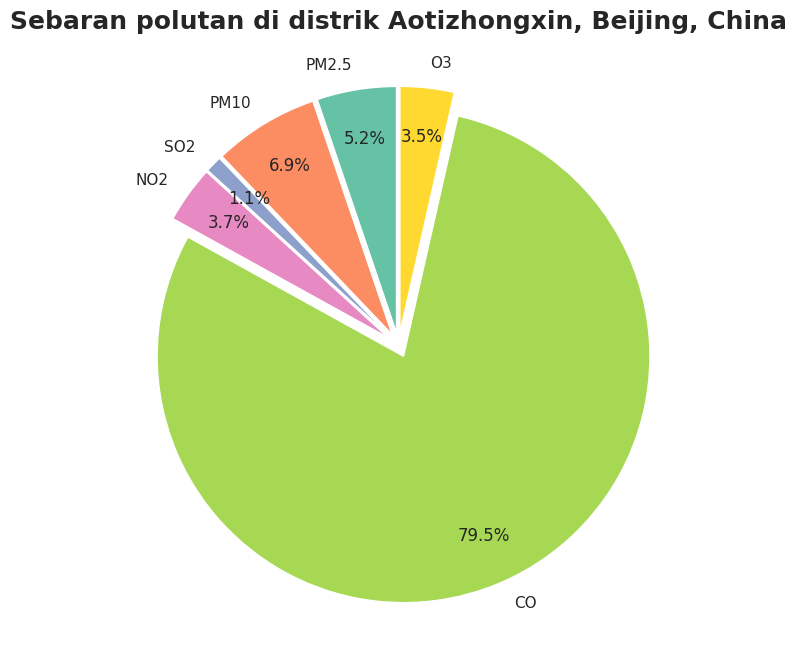

In [ ]:
## Fungsi untuk membuat piechart
def piechart(dataframe,title):
  pollutant = ['PM2.5', 'PM10','SO2', 'NO2', 'CO', 'O3']
  counts = dataframe[pollutant].sum()

  sns.set(font_scale=1)
  plt.figure(figsize=(8,8))
  sns.set_style("whitegrid")
  plt.pie(x = counts,
          labels = pollutant,
          autopct='%1.1f%%',
          colors = sns.color_palette("Set2"),
          startangle=90,
          pctdistance=0.80,
          explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
  plt.title('Sebaran polutan di distrik ' + title +", Beijing, China", weight='bold').set_fontsize('18')

  plt.show()


piechart(aotizhongxin_df,"Aotizhongxin")

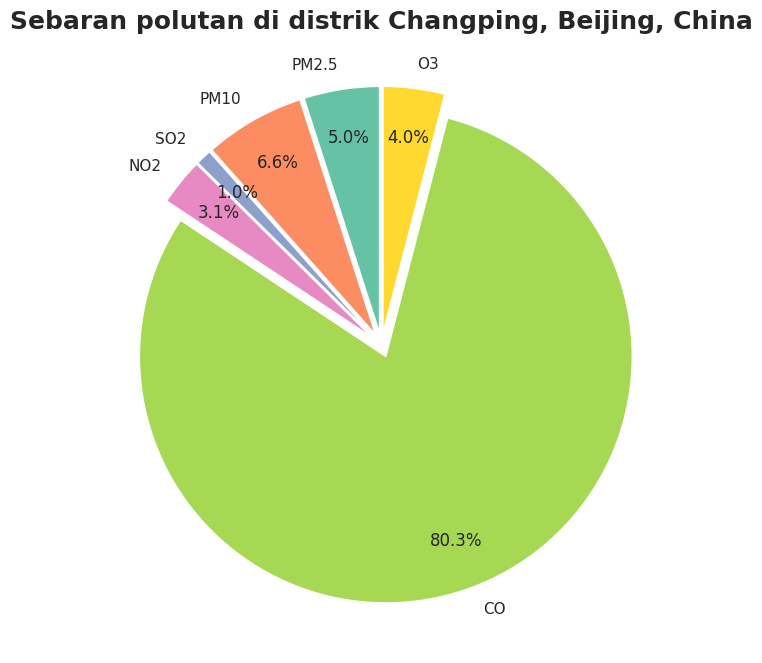

In [ ]:
piechart(changping_df,"Changping")

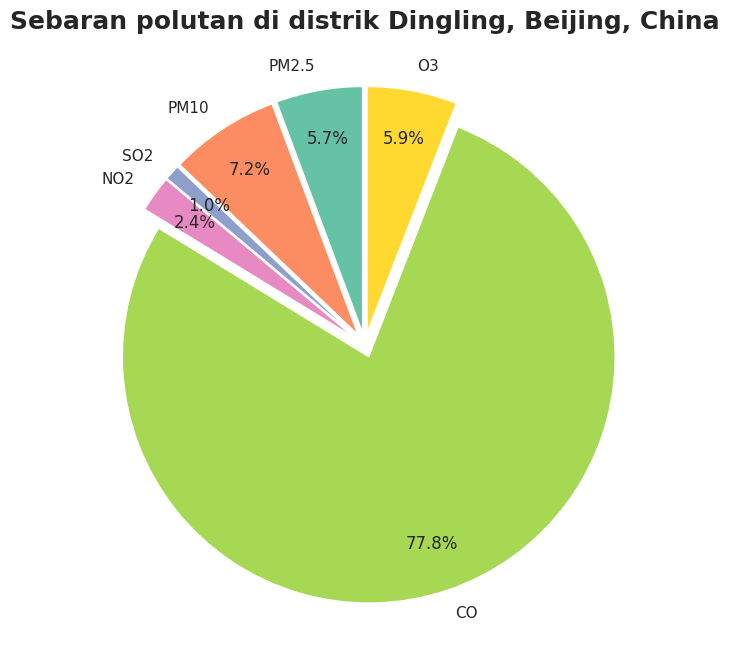

In [ ]:
piechart(dingling_df,"Dingling")

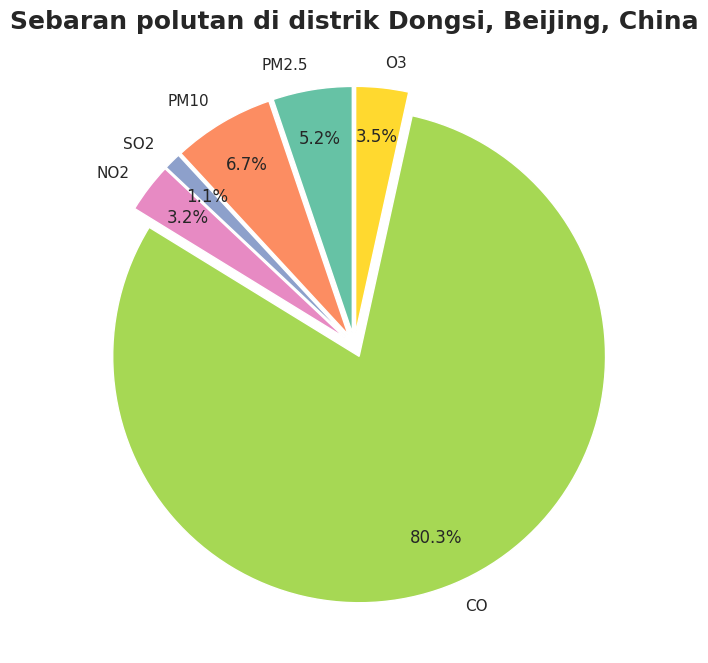

In [ ]:
piechart(dongsi_df,"Dongsi")

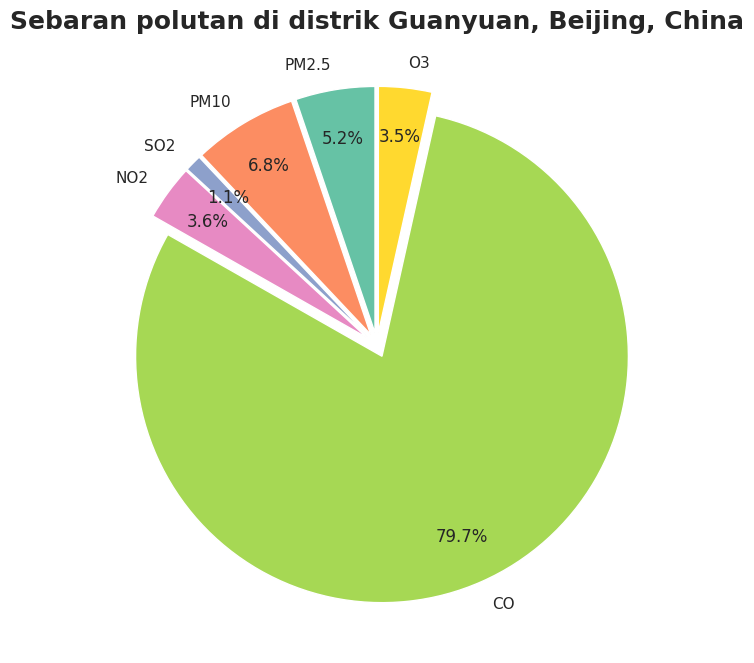

In [ ]:
piechart(guanyuan_df,"Guanyuan")

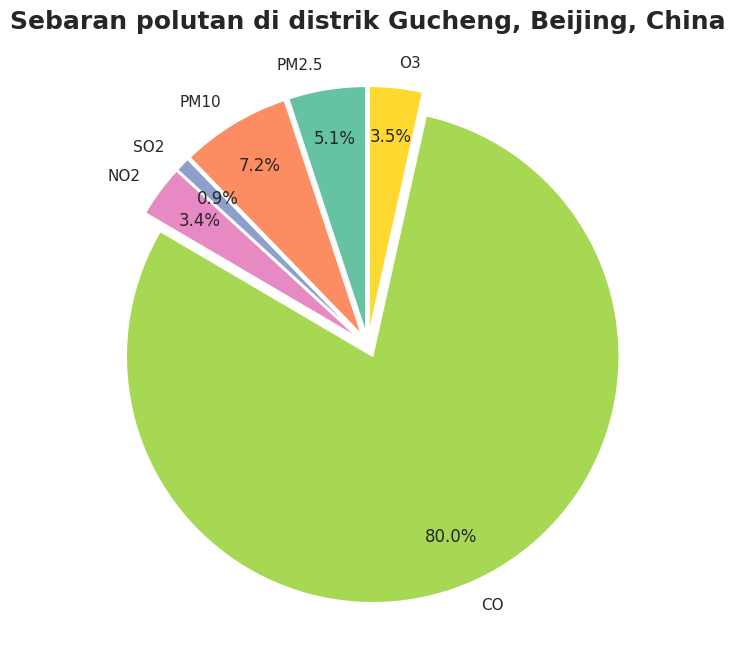

In [ ]:
piechart(gucheng_df,"Gucheng")

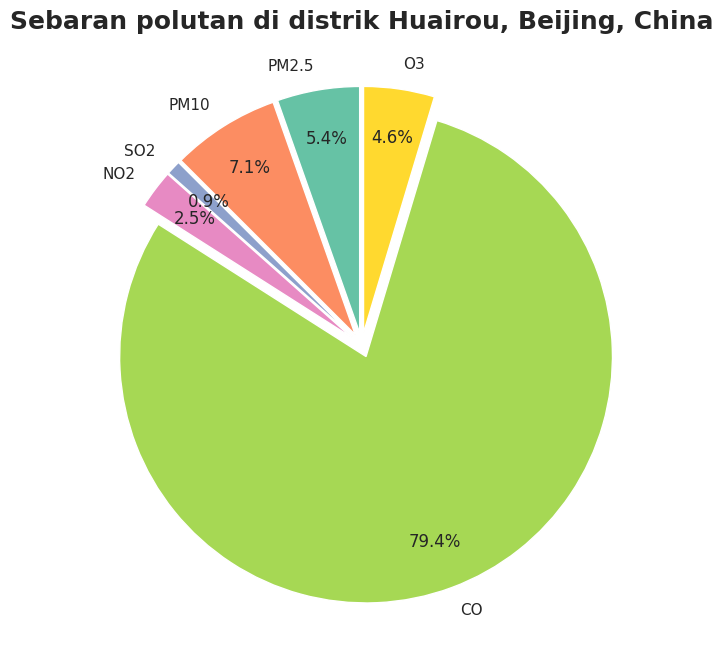

In [ ]:
piechart(huairou_df,"Huairou")

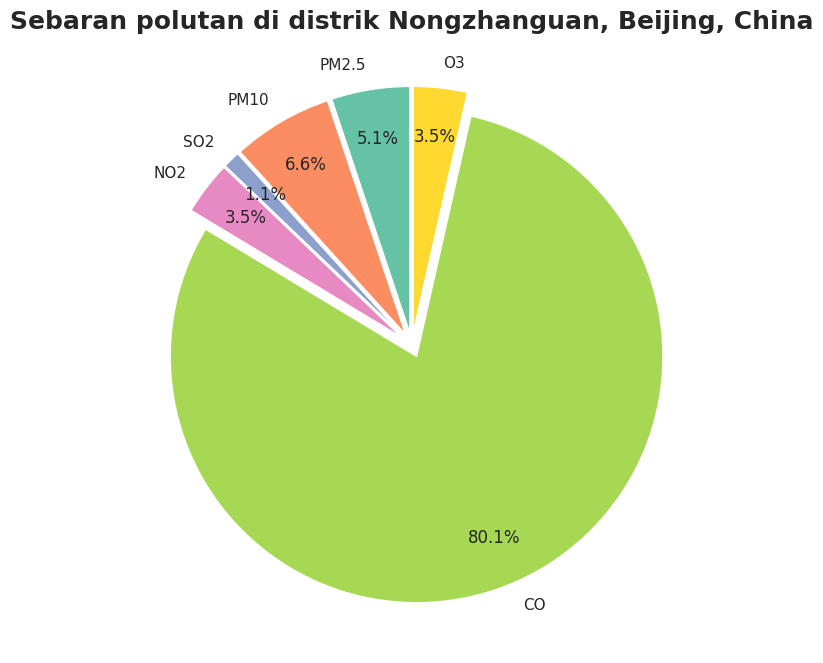

In [ ]:
piechart(nongzhanguan_df,"Nongzhanguan")

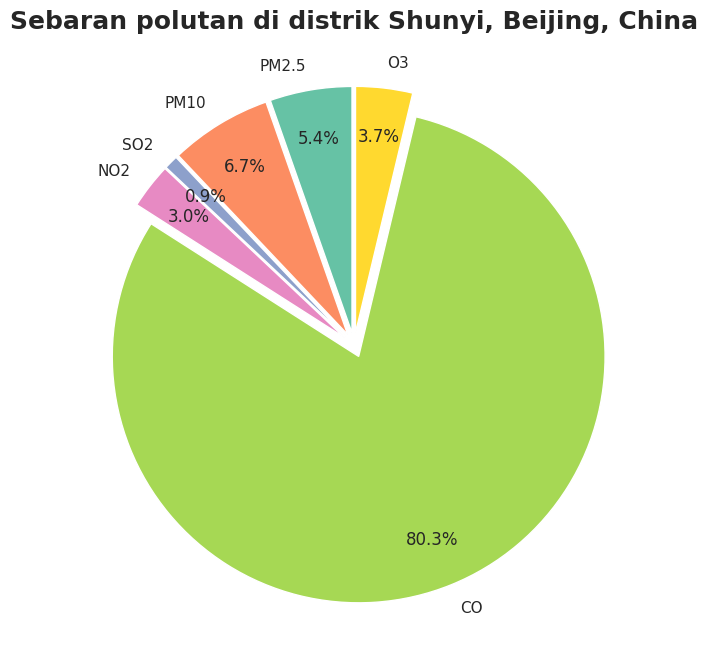

In [ ]:
piechart(shunyi_df,"Shunyi")

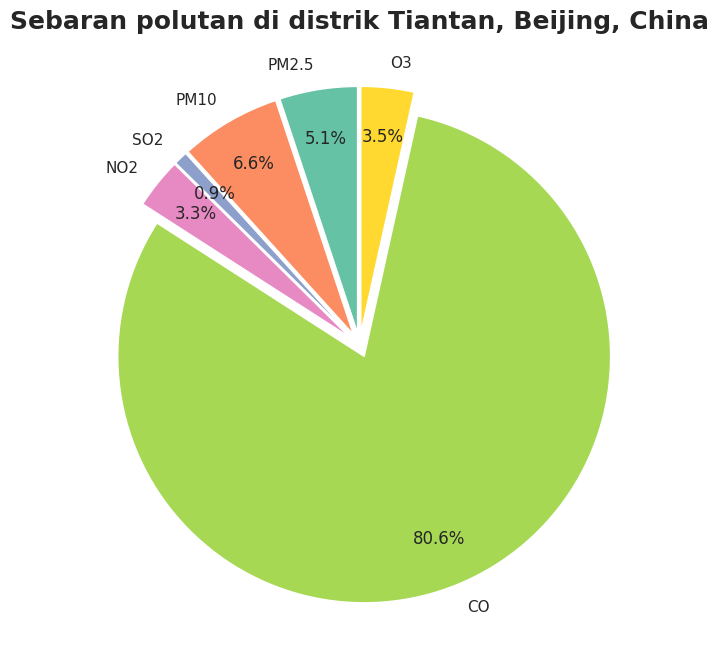

In [ ]:
piechart(tiantan_df,"Tiantan")

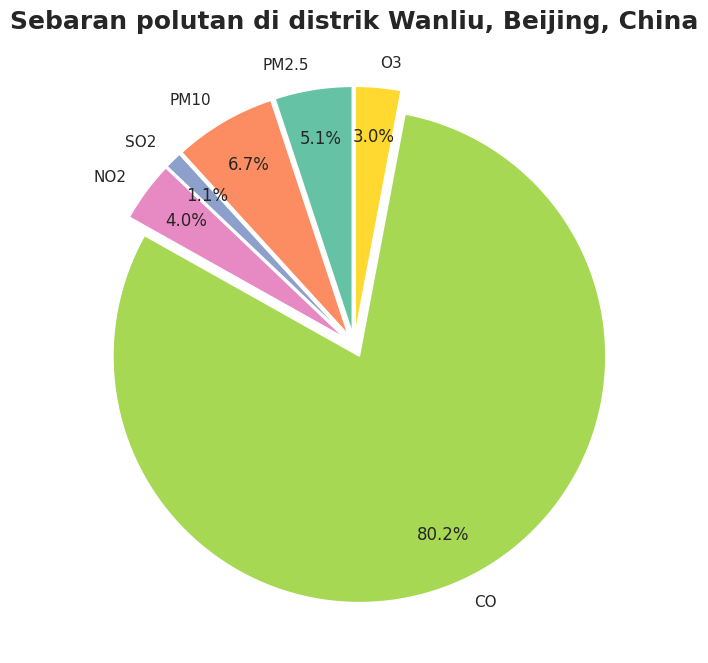

In [ ]:
piechart(wanliu_df,"Wanliu")

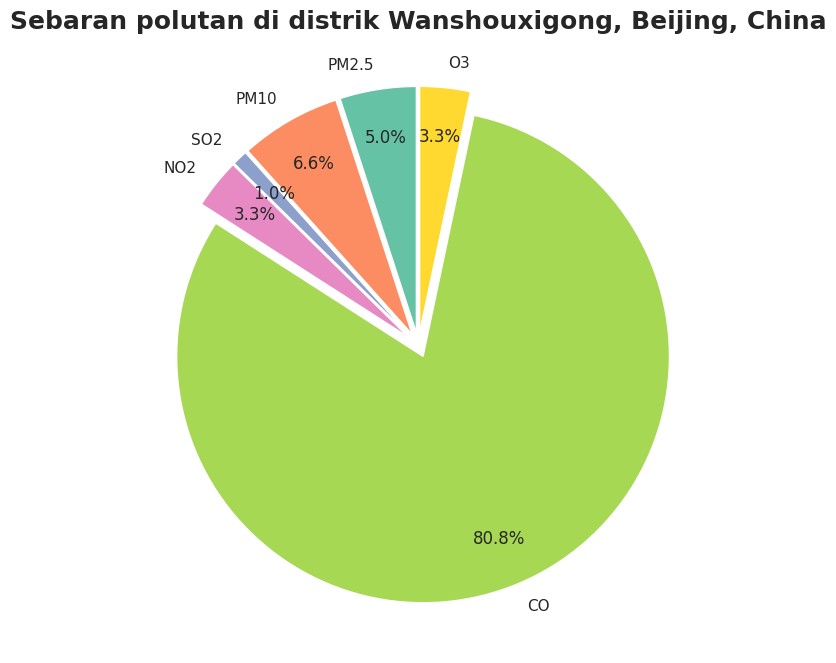

In [ ]:
piechart(wanshouxigong_df, "Wanshouxigong")

### Pertanyaan 2:

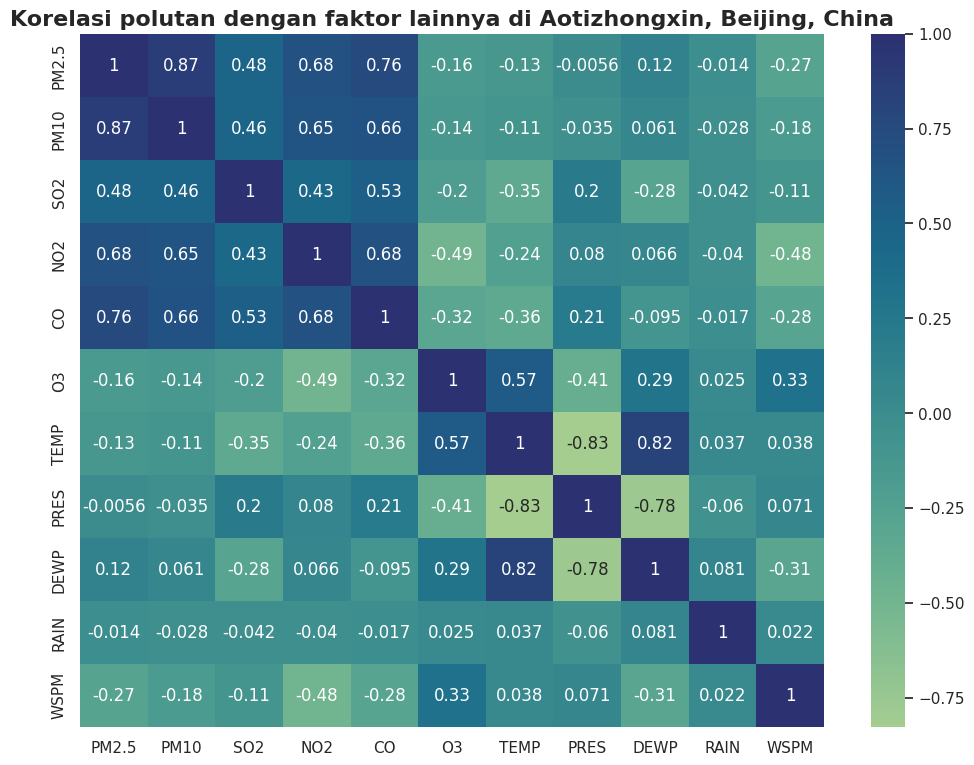

In [26]:
## Fungsi heatmap
def heatmap(dataframe,title):
  correlation_data = dataframe[["PM2.5",	"PM10",	"SO2",	"NO2",	"CO",	"O3",	"TEMP",
                      "PRES",	"DEWP",	"RAIN",	"WSPM"]]

  plt.figure(figsize=(12,9))
  sns.heatmap(correlation_data.corr(), cmap="crest", annot=True)
  plt.title('Korelasi polutan dengan faktor lainnya di ' + title +", Beijing, China", weight='bold').set_fontsize('16')
  plt.show()

heatmap(aotizhongxin_df,"Aotizhongxin")

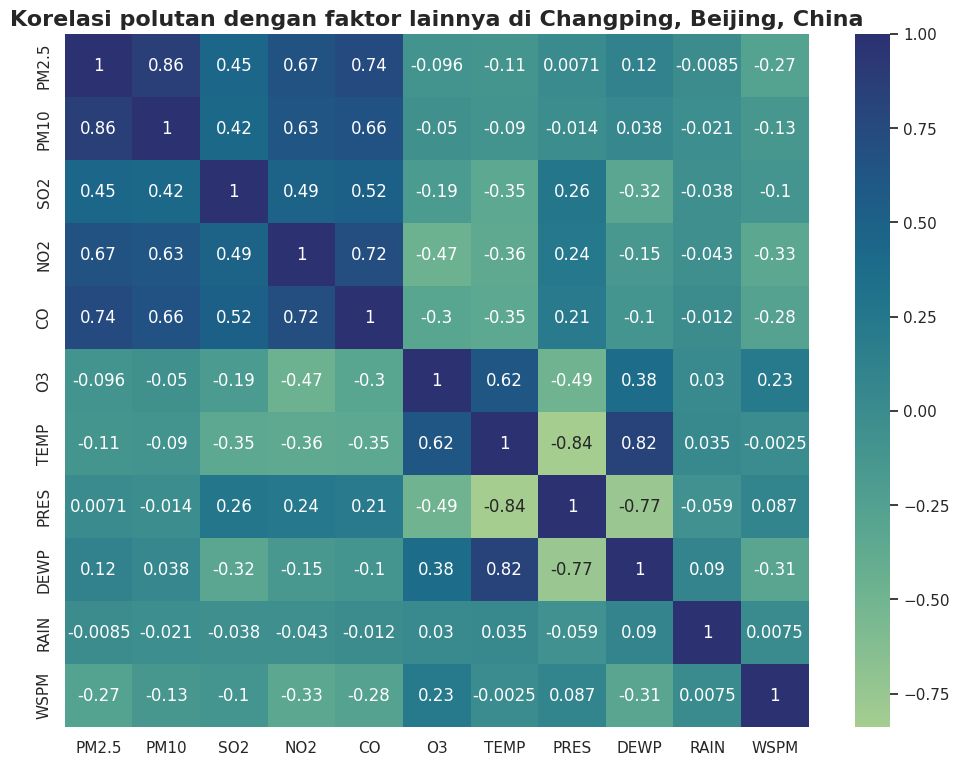

In [ ]:
heatmap(changping_df,"Changping")

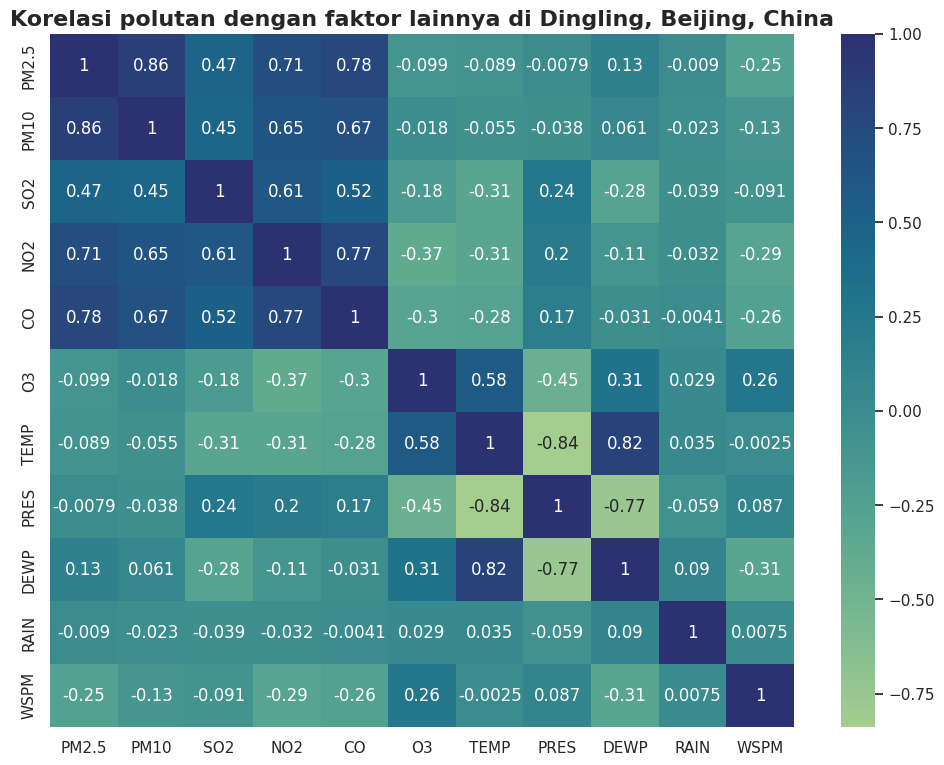

In [ ]:
heatmap(dingling_df,"Dingling")

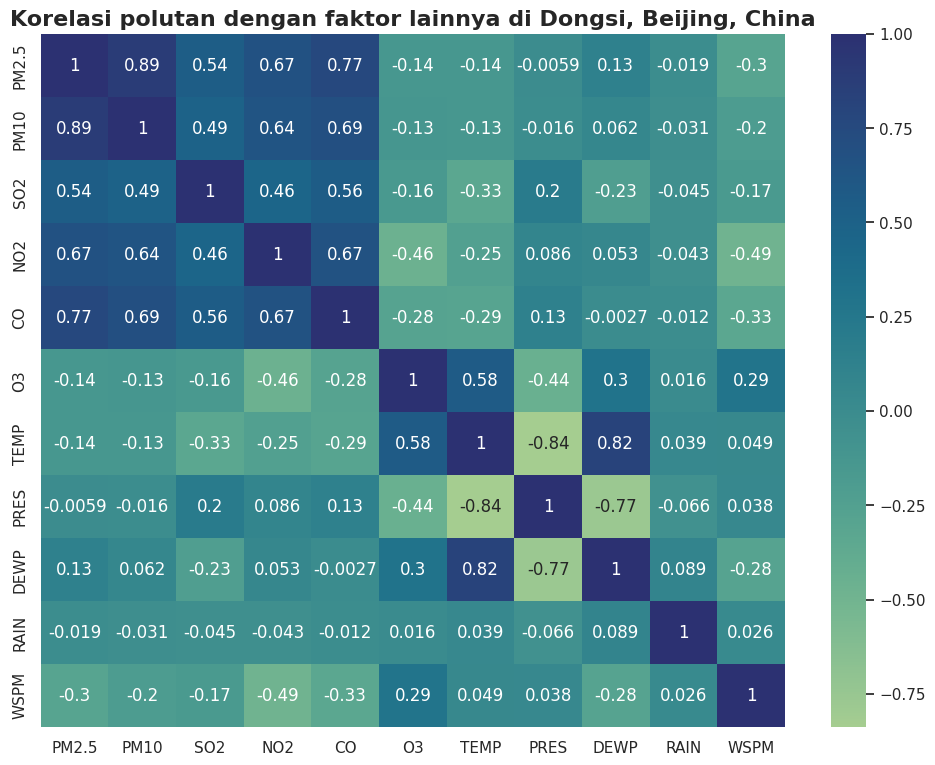

In [ ]:
heatmap(dongsi_df,"Dongsi")

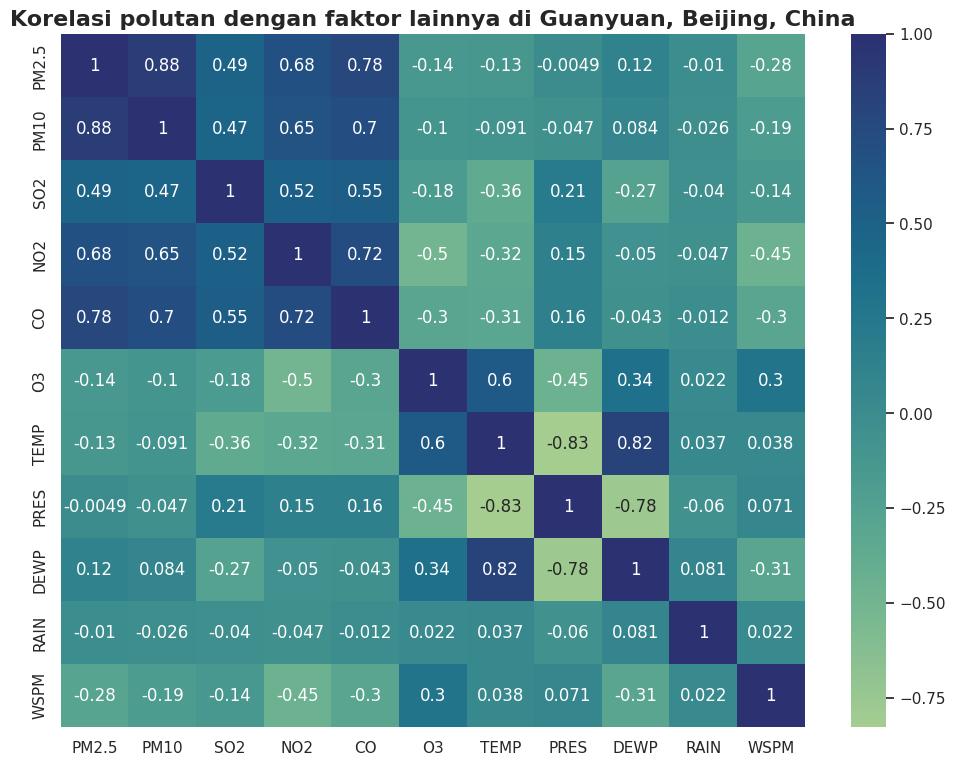

In [ ]:
heatmap(guanyuan_df,"Guanyuan")

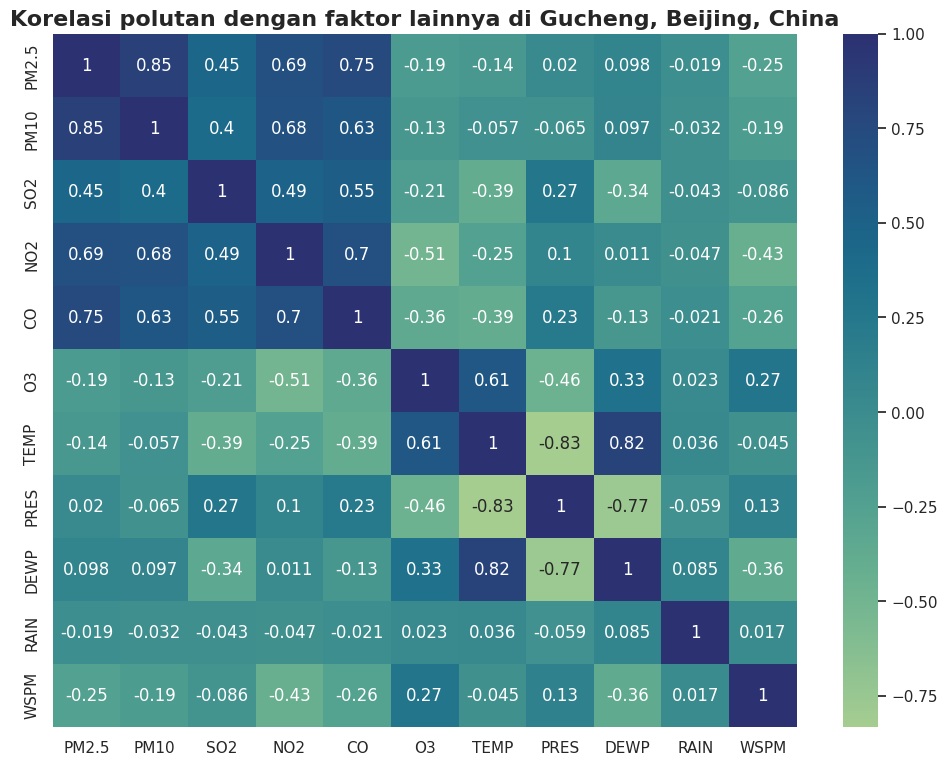

In [ ]:
heatmap(gucheng_df,"Gucheng")

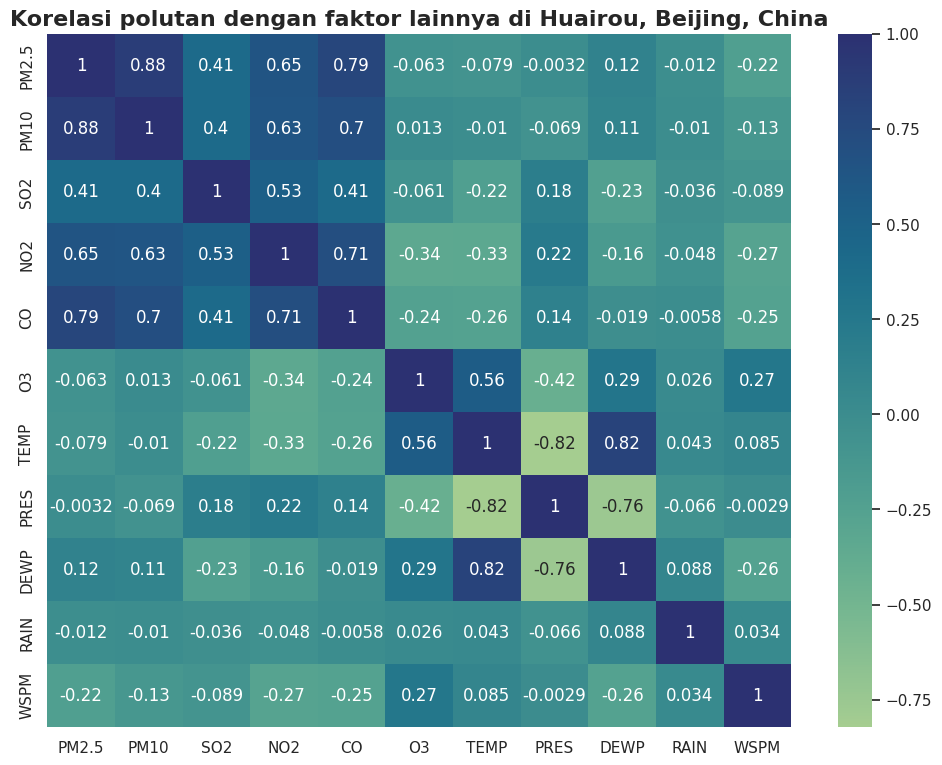

In [ ]:
heatmap(huairou_df,"Huairou")

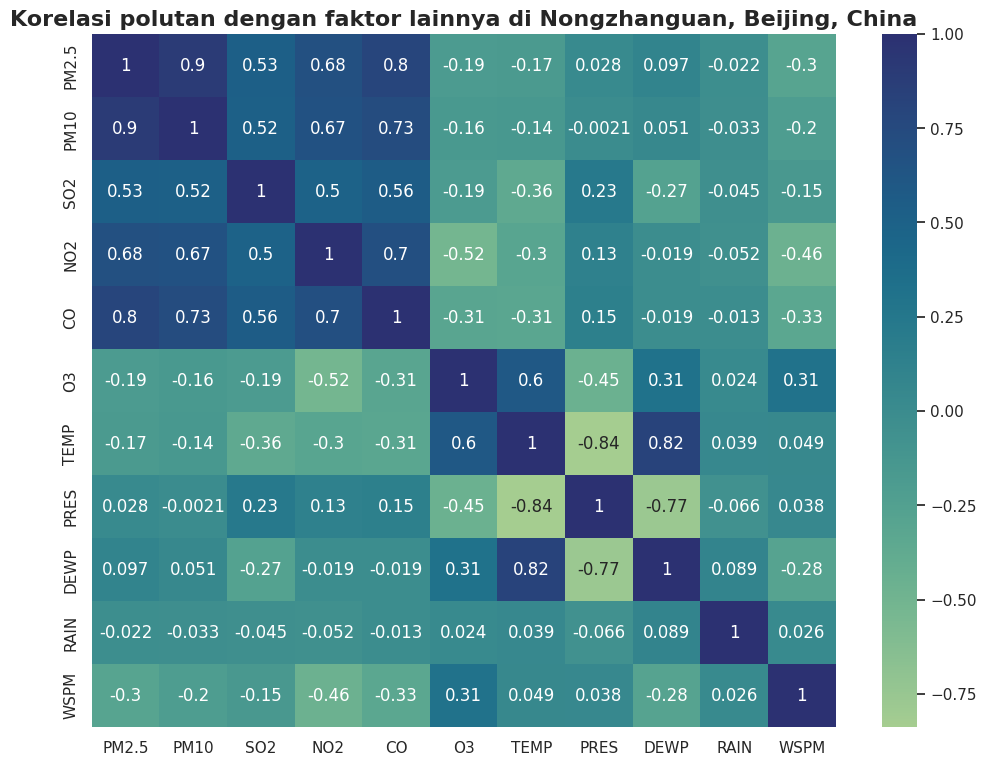

In [ ]:
heatmap(nongzhanguan_df,"Nongzhanguan")

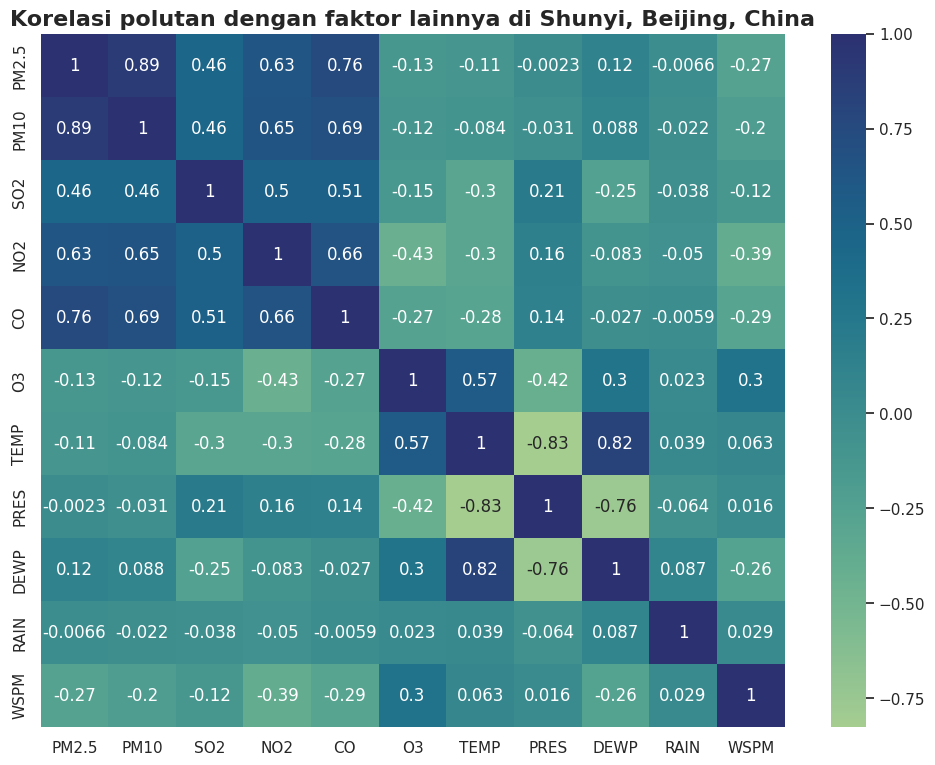

In [ ]:
heatmap(shunyi_df,"Shunyi")

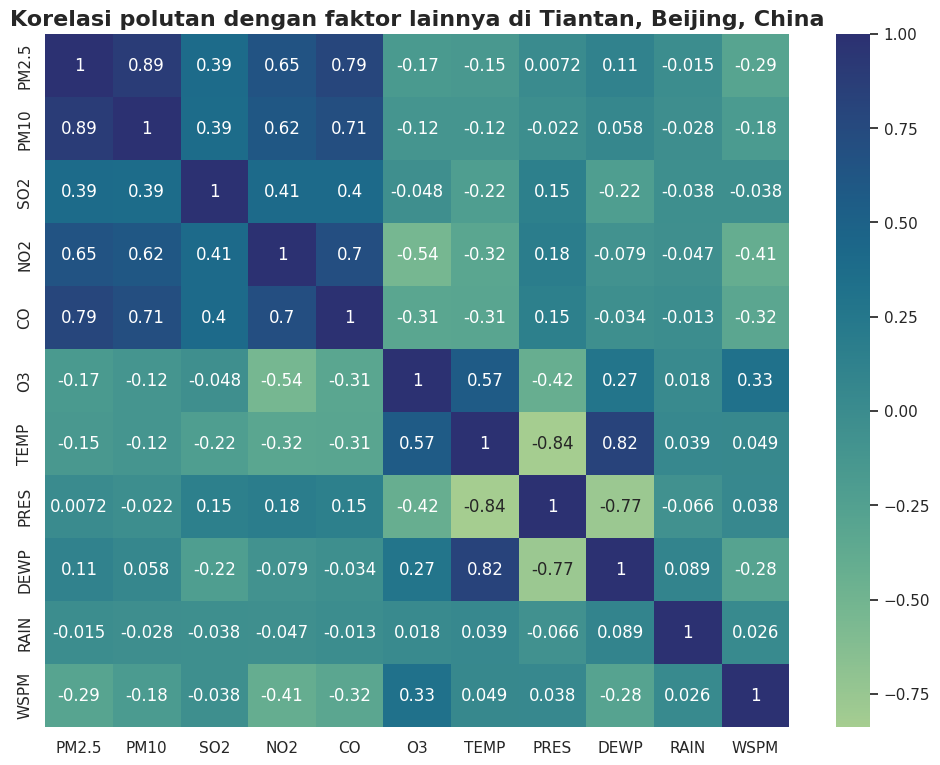

In [ ]:
heatmap(tiantan_df,"Tiantan")

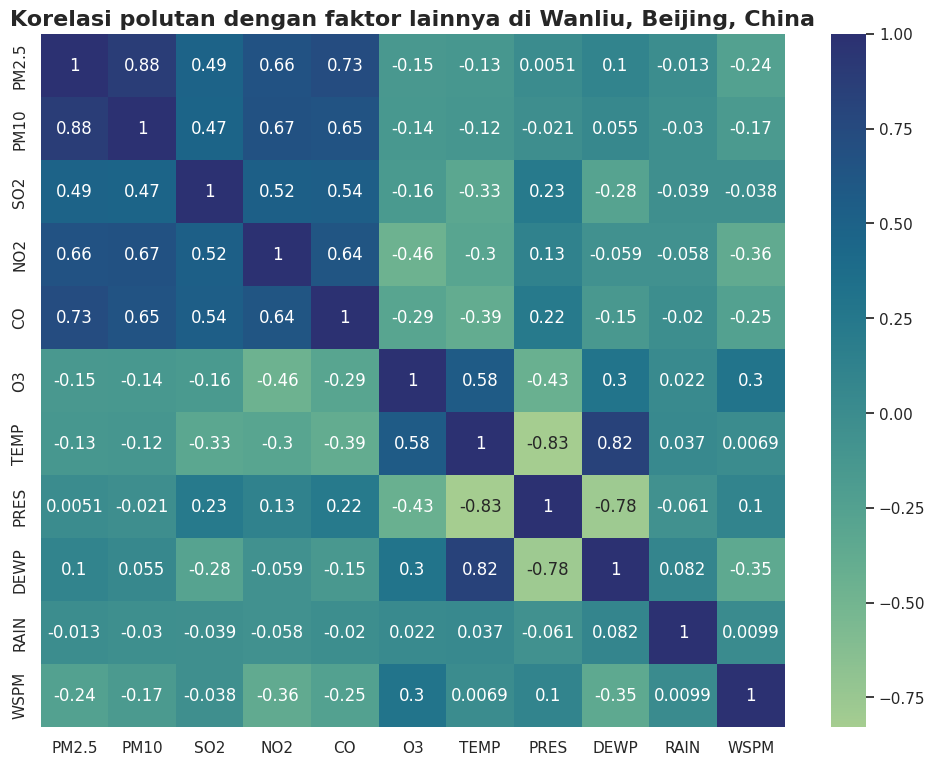

In [25]:
heatmap(wanliu_df,"Wanliu")

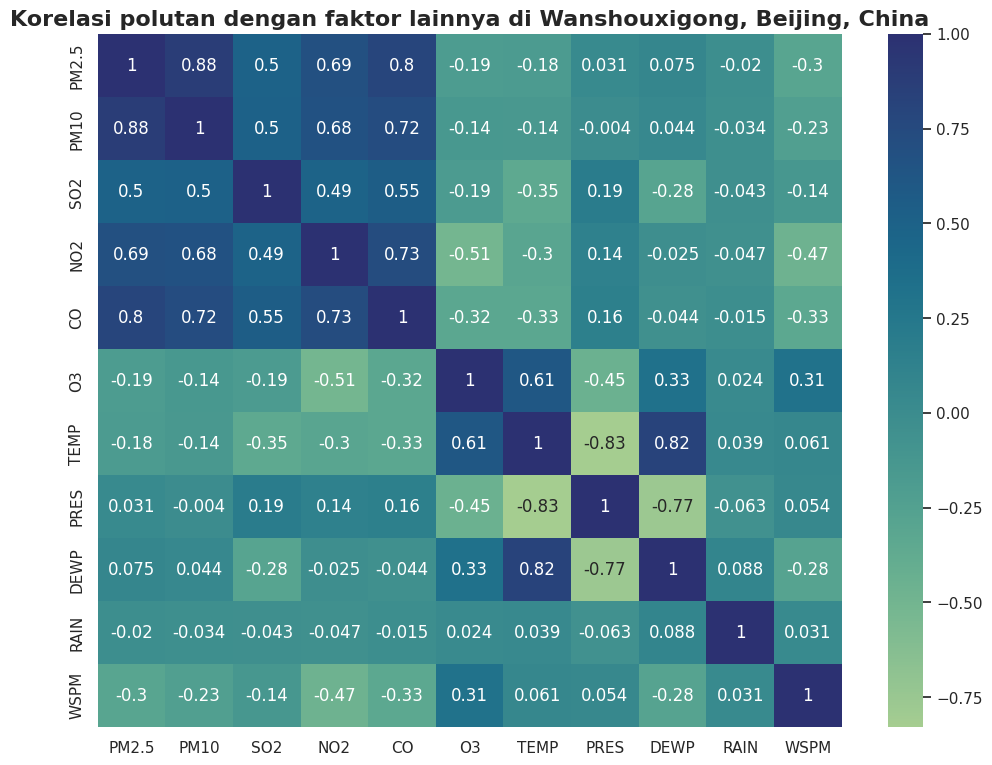

In [27]:
heatmap(wanshouxigong_df, "Wanshouxigong")

## Conclusion

- Dari 12 distrik, hampir semua polutannya berasal dari CO sebesar 80%, kemudian diikuti oleh PM10, dan PM2.5
- Semua polutan memiliki korelasi positif dengan polutan lainnya kecuali ozone. Dan curah hujan dan polutan memiliki korelasi negatif. Hal ini dapat diartikan bahwa ketika polutan cenderung mengurang ketika curah hujan tinggi

---



In [14]:
dataframes = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df,
              gucheng_df, huairou_df, nongzhanguan_df, shunyi_df,
              tiantan_df, wanliu_df,wanshouxigong_df]



aotizhongxin_df.to_csv("aotizhongxin_df.csv", index=False)
changping_df.to_csv("changping_df.csv", index=False)
dingling_df.to_csv("dingling_df.csv", index=False)
dongsi_df.to_csv("dongsi_df.csv", index=False)
guanyuan_df.to_csv("guanyuan_df.csv", index=False)
gucheng_df.to_csv("gucheng_df.csv", index=False)
huairou_df.to_csv("huairou_df.csv", index=False)
nongzhanguan_df.to_csv("nongzhanguan_df.csv", index=False)
shunyi_df.to_csv("shunyi_df.csv", index=False)
tiantan_df.to_csv("tiantan_df.csv", index=False)
wanliu_df.to_csv("wanliu_df.csv", index=False)
wanshouxigong_df.to_csv("wanshouxigong_df.csv", index=False)


NameError: name 'aotizhongxin_df' is not defined

In [15]:
merged_df.to_csv("merged_df.csv", index=False)